In [7]:
import random
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values



# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
#!conda install -c districtdatalabs yellowbrick
#from yellowbrick.cluster import KElbowVisualizer

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
data_chi=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Chicago/chicago_data.csv')
data_chi=data_chi.drop(columns='Unnamed: 0').reset_index(drop=True)

data_sf=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/San Francisco/sanfran_data.csv')
data_sf=data_sf.drop(columns='Unnamed: 0').reset_index(drop=True)

data_tor=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Toronto/data_tor.csv')
data_tor=data_tor.drop(columns='Unnamed: 0').reset_index(drop=True)

data_manh=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Manhattan/data_manh.csv')
data_manh=data_manh.drop(columns='Unnamed: 0').reset_index(drop=True)

In [3]:
data_master=[data_chi,data_sf,data_tor,data_manh]
col_join=['Neighborhood','City','Latitude','Longitude']
data_mast=pd.DataFrame(columns={"Borough","Neighborhood","Latitude","Longitude","City"})

# Function to rename columns and add borough data to all dataframes in list df
for i in range(len(data_master)):
    df1=data_master[i]
    cols=df1.columns
    df1=df1.fillna(value=cols[0],axis='columns')
    data_mast=data_mast.append(df1)
    i = i + 1
    
data_mast=data_mast.reset_index(drop=True)    
data_mast

Latitude                       City  \
0    41.878545          Chicago, Illinois   
1    41.870981          Chicago, Illinois   
2    41.882774          Chicago, Illinois   
3    41.899236          Chicago, Illinois   
4    41.894784          Chicago, Illinois   
5    41.943924          Chicago, Illinois   
6    41.899630          Chicago, Illinois   
7    41.950593          Chicago, Illinois   
8    41.979854          Chicago, Illinois   
9    41.874298          Chicago, Illinois   
10   41.927188          Chicago, Illinois   
11   41.899428          Chicago, Illinois   
12   41.906006          Chicago, Illinois   
13   41.851733          Chicago, Illinois   
14   41.911370          Chicago, Illinois   
15   41.728182          Chicago, Illinois   
16   41.823775          Chicago, Illinois   
17   41.908685          Chicago, Illinois   
18   41.929313          Chicago, Illinois   
19   41.881965          Chicago, Illinois   
20   41.808916          Chicago, Illinois   
21   41.836091          Chicago, Illinois   
22   41.914187          Chicago, Illinois   
23   41.809085          Chicago, Illinois   
24   41.829922          Chicago, Illinois   
25   42.007613          Chicago, Illinois   
26   41.921687          Chicago, Illinois   
27   41.792982          Chicago, Illinois   
28   41.856296          Chicago, Illinois   
29   41.924348          Chicago, Illinois   
30   41.744200          Chicago, Illinois   
31   41.794825          Chicago, Illinois   
32   41.792358          Chicago, Illinois   
33   41.812949          Chicago, Illinois   
34   41.778787          Chicago, Illinois   
35   41.835118          Chicago, Illinois   
36   41.988403          Chicago, Illinois   
37   41.947792          Chicago, Illinois   
38   41.899015          Chicago, Illinois   
39   41.810880          Chicago, Illinois   
40   41.795431          Chicago, Illinois   
41   41.836151          Chicago, Illinois   
42   41.781854          Chicago, Illinois   
43   41.729676          Chicago, Illinois   
44   42.009623          Chicago, Illinois   
45   41.938666          Chicago, Illinois   
46   41.863032          Chicago, Illinois   
47   41.706127          Chicago, Illinois   
48   41.923193          Chicago, Illinois   
49   41.817367          Chicago, Illinois   
50   41.867539          Chicago, Illinois   
51   41.972233          Chicago, Illinois   
52   41.968068          Chicago, Illinois   
53   41.771849          Chicago, Illinois   
54   41.893526          Chicago, Illinois   
55   41.983636          Chicago, Illinois   
56   41.769779          Chicago, Illinois   
57   41.740206          Chicago, Illinois   
58   41.717494          Chicago, Illinois   
59   42.001572          Chicago, Illinois   
60   41.848386          Chicago, Illinois   
61   41.927261          Chicago, Illinois   
62   41.882274          Chicago, Illinois   
63   41.978830          Chicago, Illinois   
64   41.761578          Chicago, Illinois   
65   41.878786          Chicago, Illinois   
66   41.713150          Chicago, Illinois   
67   41.860190          Chicago, Illinois   
68   41.779581          Chicago, Illinois   
69   41.900889          Chicago, Illinois   
70   41.689730          Chicago, Illinois   
71   41.660137          Chicago, Illinois   
72   41.954028          Chicago, Illinois   
73   41.744205          Chicago, Illinois   
74   41.894562          Chicago, Illinois   
75   41.965812          Chicago, Illinois   
76   41.809019          Chicago, Illinois   
77   41.694879          Chicago, Illinois   
78   41.953582          Chicago, Illinois   
79   41.673820          Chicago, Illinois   
80   41.839087          Chicago, Illinois   
81   41.707314          Chicago, Illinois   
82   41.741243          Chicago, Illinois   
83   41.880979          Chicago, Illinois   
84   41.763247          Chicago, Illinois   
85   41.946511          Chicago, Illinois   
86   41.745757          Chicago, Illinois   
87   41.890650          Chicago, Illinois   
8

In [4]:
#Reorganize Columns from joined tables
cols=data_mast.columns.tolist()
cols=[cols[2], cols[3], cols[0], cols[4], cols[1]]
data_mast=data_mast[cols]

In [5]:
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders
from arcgis.gis import GIS
from arcgis.geocoding import reverse_geocode
### Open ArcGIS Credentials
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\arcgiscreds.json') as f:
    data = json.load(f)
    arcgis_creds = {'url':data['url'],'Username':data['Username'],'Password':data['Password']}

gis = GIS(arcgis_creds['url'], arcgis_creds['Username'], arcgis_creds['Password'])
get_geocoders(gis)

[<Geocoder url:"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer">]

In [6]:
data_mast=data_mast.sort_values('Neighborhood')
def find_zip(names, longitudes, latitudes, distance=500):
    
    zips_list=[]
    for name, lng, lat in zip(names, longitudes, latitudes):
        print(name)
            
        results = reverse_geocode([lng, lat],distance)['address']['Postal']
                 
        zips_list.append([(
            name,
            lng, 
            lat, 
            results)])
               
    
    coord_zips = pd.DataFrame([item for zip_list in zips_list for item in zip_list])
    coord_zips.columns = ['Neighborhood', 
                        'Longitude', 
                        'Latitude',  
                        'Postal Code']

    return(coord_zips)

In [7]:
nbrhd_zips = find_zip(names=data_mast['Neighborhood'],
                                   longitudes=data_mast['Longitude'],
                                   latitudes=data_mast['Latitude'])

Agincourt North
Agincourt South-Malvern West
Alamo Square
Albany Park
Alderwood
Andersonville
Annex
Anza Vista
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Austin
Avalon Park
Avondale
Balboa Terrace
Banbury-Don Mills
Bathurst Manor
Battery Park City
Bay Street Corridor
Bayview
Bayview Heights
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Belmont Cragin
Bendale
Bernal Heights
Beverly
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Boystown
Briar Hill-Belgravia
Bridgeport
Bridle Path-Sunnybrook-York Mills
Brighton Park
Broadview North
Brookhaven-Amesbury
Bucktown
Buena Vista Park/Ashbury Heights
Burnside
Cabbagetown-South St. James Town
Caledonia-Fairbank
Calumet Heights
Candlestick Point
Carnegie Hill
Casa Loma
Centennial Scarborough
Central Harlem
Central Richmond
Central Sunset
Central Waterfront/Dogpatch
Chatham
Chelsea
Chicago Lawn
Chinatown
Chinatown
Church-Yonge Corridor
Civic Center
Clairlea-Birchmount
Clanton Park
Clarendon Heights
Clear

In [8]:
nbrhd_zips.head()

Neighborhood   Longitude   Latitude Postal Code
0               Agincourt North  -79.266712  43.805441         M1S
1  Agincourt South-Malvern West  -79.265612  43.788658         M1S
2                  Alamo Square -122.434465  37.776566       94117
3                   Albany Park  -87.721560  41.968068       60625
4                     Alderwood  -79.541611  43.604937         M8W

In [9]:
# Save API geocode pull in order to avoid ArcGis token usage (One can use pickle in the above function, also)
nbrhd_zips.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/master_nbrhd_zip.csv')

In [10]:
#Merge Zipcode Dataframe with rest of master dataframe
data_mast=pd.merge(data_mast.sort_values("Neighborhood"),nbrhd_zips.sort_values("Neighborhood"),on="Neighborhood")
#Drop & Rename Columns
data_mast=data_mast.drop(columns=['Latitude_y','Longitude_y']).rename(columns={'Latitude_x':'Latitude','Longitude_x':'Longitude'})

In [11]:
data_mast['City']=data_mast['City'].fillna('New York City, New York')

In [12]:
data_mast

Neighborhood   Longitude   Latitude  \
0                        Agincourt North  -79.266712  43.805441   
1           Agincourt South-Malvern West  -79.265612  43.788658   
2                           Alamo Square -122.434465  37.776566   
3                            Albany Park  -87.721560  41.968068   
4                              Alderwood  -79.541611  43.604937   
5                          Andersonville  -87.667865  41.979854   
6                                  Annex  -79.404001  43.671585   
7                             Anza Vista -122.443353  37.781006   
8                         Archer Heights  -87.726363  41.810880   
9                          Armour Square  -87.633222  41.836091   
10                               Ashburn  -87.708365  41.745757   
11                        Auburn Gresham  -87.656307  41.744205   
12                                Austin  -87.758010  41.890650   
13                           Avalon Park  -87.586349  41.744200   
14                              Avondale  -87.711211  41.938666   
15                        Balboa Terrace -122.468460  37.731391   
16                     Banbury-Don Mills  -79.349718  43.737657   
17                        Bathurst Manor  -79.456055  43.764813   
18                     Battery Park City  -74.016869  40.711932   
19                   Bay Street Corridor  -79.385721  43.657511   
20                               Bayview -122.385272  37.720777   
21                       Bayview Heights -122.396834  37.719529   
22                       Bayview Village  -79.377117  43.776361   
23                 Bayview Woods-Steeles  -79.382118  43.796802   
24                  Bedford Park-Nortown  -79.420227  43.731486   
25               Beechborough-Greenbrook  -79.479473  43.693216   
26                        Belmont Cragin  -87.765502  41.927261   
27                               Bendale  -79.257400  43.760366   
28                        Bernal Heights -122.416410  37.739840   
29                               Beverly  -87.675075  41.713150   
30                 Birchcliffe-Cliffside  -79.265093  43.694682   
31                           Black Creek  -79.521979  43.764890   
32                           Blake-Jones  -79.337394  43.676173   
33                              Boystown  -87.647447  41.943924   
34                  Briar Hill-Belgravia  -79.452851  43.699024   
35                            Bridgeport  -87.648788  41.836151   
36     Bridle Path-Sunnybrook-York Mills  -79.378904  43.731013   
37                         Brighton Park  -87.698861  41.817367   
38                       Broadview North  -79.355630  43.688825   
39                   Brookhaven-Amesbury  -79.485589  43.701326   
40                              Bucktown  -87.678785  41.921687   
41      Buena Vista Park/Ashbury Heights -122.441887  37.767965   
42                              Burnside  -87.596476  41.728182   
43      Cabbagetown-South St. James Town  -79.366107  43.667648   
44                    Caledonia-Fairbank  -79.455212  43.688569   
45                       Calumet Heights  -87.572718  41.729676   
46                     Candlestick Point -122.386528  37.713579   
47                         Carnegie Hill  -73.953256  40.782683   
48                             Casa Loma  -79.408007  43.681852   
49                Centennial Scarborough  -79.150843  43.782376   
50                        Central Harlem  -73.943211  40.815976   
51                      Central Richmond -122.482131  37.778232   
52                        Central Sunset -122.486262  37.758480   
53           Central Waterfront/Dogpatch -122.386370  37.757000   
54                               Chatham  -87.615970  41.740206   
55                               Chelsea  -74.003116  40.744035   
56                          Chicago Lawn  -87.695666  41.771849   
57                             Chinatown  -87.635186  41.851733   
58                             Chinatown  -87.635186  41.851733   
59      

In [13]:
grouped = data_mast.groupby(data_mast.City)
sanfran_data = grouped.get_group("San Francisco, California").reset_index(drop=True)
manhattan_data=grouped.get_group("New York City, New York").reset_index(drop=True)
toronto_data=grouped.get_group("Toronto, Canada").reset_index(drop=True)
chicago_data=grouped.get_group("Chicago, Illinois").reset_index(drop=True)

## Pull Foursquare Data using Rest API

In [10]:
### Open Foursquare Credentials
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\fsquarecreds.json') as f:
    data = json.load(f)
    fsquare_creds = {'CLIENT_ID':data['CLIENT_ID'],'CLIENT_SECRET':data['CLIENT_SECRET'],'VERSION':data['VERSION']}

In [8]:
#Define function to get nearby venues based on Neighborhood Lat/Lng


def getNearbyVenues(names, latitudes, longitudes, radius=1000,limit=120):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            fsquare_creds['CLIENT_ID'], 
            fsquare_creds['CLIENT_SECRET'], 
            fsquare_creds['VERSION'], 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
#code to run the above function on each neighborhood and create a new dataframe called *df_venues*

sanfran_data_venues = getNearbyVenues(names=sanfran_data['Neighborhood'],
                                   latitudes=sanfran_data['Latitude'],
                                   longitudes=sanfran_data['Longitude'])

Alamo Square
Anza Vista
Balboa Terrace
Bayview
Bayview Heights
Bernal Heights
Buena Vista Park/Ashbury Heights
Candlestick Point
Central Richmond
Central Sunset
Central Waterfront/Dogpatch
Clarendon Heights
Cole Valley/Parnassus Heights
Corona Heights
Cow Hollow
Crocker Amazon
Diamond Heights
Downtown
Duboce Triangle
Eureka Valley / Dolores Heights
Excelsior
Financial District/Barbary Coast
Forest Hill
Forest Hills Extension
Forest Knolls
Glen Park
Golden Gate Heights
Golden Gate Park
Haight Ashbury
Hayes Valley
Hunters Point
Ingleside
Ingleside Heights
Ingleside Terrace
Inner Mission
Inner Parkside
Inner Richmond
Inner Sunset
Jordan Park / Laurel Heights
Lake Shore
Lake Street
Lakeside
Lincoln Park
Lincoln Park
Little Hollywood
Lone Mountain
Lower Pacific Heights
Marina
Merced Heights
Merced Manor
Midtown Terrace
Miraloma Park
Mission Bay
Mission Dolores
Mission Terrace
Monterey Heights
Mount Davidson Manor
Nob Hill
Noe Valley
North Beach
North Panhandle
North Waterfront
Oceanview
Out

In [23]:
chicago_data_venues = getNearbyVenues(names=chicago_data['Neighborhood'],
                                   latitudes=chicago_data['Latitude'],
                                   longitudes=chicago_data['Longitude'])

Albany Park
Andersonville
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Austin
Avalon Park
Avondale
Belmont Cragin
Beverly
Boystown
Bridgeport
Brighton Park
Bucktown
Burnside
Calumet Heights
Chatham
Chicago Lawn
Chinatown
Chinatown
Clearing
Douglas
Dunning
East Side
East Village
East Village
Edgewater
Edison Park
Englewood
Fuller Park
Gage Park
Galewood
Garfield Park
Garfield Ridge
Gold Coast
Grand Boulevard
Grand Crossing
Grant Park
Greektown
Hegewisch
Hermosa
Humboldt Park
Hyde Park
Irving Park
Jackson Park
Jefferson Park
Kenwood
Lake View
Lincoln Park
Lincoln Park
Lincoln Square
Lincoln Square
Little Italy, UIC
Little Village
Logan Square
Loop
Lower West Side
Magnificent Mile
Mckinley Park
Millenium Park
Montclare
Morgan Park
Mount Greenwood
Museum Campus
Near South Side
New City
North Center
North Lawndale
North Park
Norwood Park
O'Hare
Oakland
Old Town
Portage Park
Printers Row
Pullman
River North
Riverdale
Rogers Park
Roseland
Rush & Division
Sauganash,Forest Glen
Sheffield

In [24]:
manhattan_data_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'])

Battery Park City
Carnegie Hill
Central Harlem
Chelsea
Chinatown
Chinatown
Civic Center
Clinton
East Harlem
East Village
East Village
Financial District
Flatiron
Gramercy
Greenwich Village
Hamilton Heights
Hudson Yards
Inwood
Lenox Hill
Lincoln Square
Lincoln Square
Little Italy
Lower East Side
Manhattan Valley
Manhattanville
Marble Hill
Midtown
Midtown South
Morningside Heights
Murray Hill
Noho
Roosevelt Island
Soho
Stuyvesant Town
Sutton Place
Tribeca
Tudor City
Turtle Bay
Upper East Side
Upper West Side
Washington Heights
Washington Heights
West Village
Yorkville


In [25]:
toronto_data_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])

Agincourt North
Agincourt South-Malvern West
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Briar Hill-Belgravia
Bridle Path-Sunnybrook-York Mills
Broadview North
Brookhaven-Amesbury
Cabbagetown-South St. James Town
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dovercourt-Wallace Emerson-Junction
Downsview-Roding-CFB
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heights-Westmount
Hu

Let's check how many venues were returned for each neighborhood. Let's also look at the number of unqiue venue categories

### San Francisco Onehot

In [26]:

## Number of Venues for each Neighborhood
print(sanfran_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(sanfran_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(sanfran_data_venues['Venue Category'].unique())))
sanfran_data_onehot = pd.get_dummies(sanfran_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
sanfran_data_onehot['Neighborhood'] = sanfran_data_venues['Neighborhood'] 
sanfran_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [sanfran_data_onehot.columns[-1]] + list(sanfran_data_onehot.columns[:-1])
print(fixed_columns)

sanfran_data_onehot = sanfran_data_onehot[fixed_columns]
sanfran_data_onehot.head()
print(sanfran_data_onehot.shape)
sanfran_data_grouped = sanfran_data_onehot.groupby('Neighborhood').mean().reset_index()
sanfran_data_grouped.head()

                 Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                            
Alamo Square                       100                     100    100   
Anza Vista                         100                     100    100   
Balboa Terrace                     100                     100    100   
Bayview                             25                      25     25   
Bayview Heights                     31                      31     31   

                 Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                      
Alamo Square                100              100             100  
Anza Vista                  100              100             100  
Balboa Terrace              100              100             100  
Bayview                      25               25              25  
Bayview Heights              31               31              31  
There are 92 unique

Neighborhood   Accessories Store   Adult Boutique   Afghan Restaurant  \
0     Alamo Square                0.01              0.0                 0.0   
1       Anza Vista                0.00              0.0                 0.0   
2   Balboa Terrace                0.01              0.0                 0.0   
3          Bayview                0.00              0.0                 0.0   
4  Bayview Heights                0.00              0.0                 0.0   

    African Restaurant   Alternative Healer   American Restaurant  \
0                  0.0                  0.0              0.010000   
1                  0.0                  0.0              0.030000   
2                  0.0                  0.0              0.000000   
3                  0.0                  0.0              0.040000   
4                  0.0                  0.0              0.032258   

    Antique Shop   Arcade   Arepa Restaurant   Argentinian Restaurant  \
0           0.01      0.0                0.0                      0.0   
1           0.01      0.0                0.0                      0.0   
2           0.00      0.0                0.0                      0.0   
3           0.00      0.0                0.0                      0.0   
4           0.00      0.0                0.0                      0.0   

    Art Gallery   Art Museum   Arts & Crafts Store   Asian Restaurant  \
0          0.00          0.0                  0.00               0.00   
1          0.00          0.0                  0.01               0.00   
2          0.01          0.0                  0.00               0.00   
3          0.04          0.0                  0.00               0.04   
4          0.00          0.0                  0.00               0.00   

    Athletics & Sports   Automotive Shop   BBQ Joint   Baby Store  \
0                  0.0               0.0        0.02          0.0   
1                  0.0               0.0        0.01          0.0   
2                  0.0               0.0        0.00          0.0   
3                  0.0               0.0        0.00          0.0   
4                  0.0               0.0        0.00          0.0   

    Bagel Shop    Bakery   Bank   Bar   Baseball Field   Baseball Stadium  \
0         0.01  0.020000   0.00  0.02              0.0                0.0   
1         0.00  0.050000   0.00  0.02              0.0                0.0   
2         0.00  0.040000   0.02  0.00              0.0                0.0   
3         0.00  0.040000   0.00  0.00              0.0                0.0   
4         0.00  0.064516   0.00  0.00              0.0                0.0   

    Basketball Court   Basketball Stadium   Bath House   Beach  \
0                0.0                  0.0          0.0     0.0   
1                0.0                  0.0          0.0     0.0   
2                0.0                  0.0          0.0     0.0   
3                0.0                  0.0          0.0     0.0   
4                0.0                  0.0          0.0     0.0   

    Bed & Breakfast   Beer Bar   Beer Garden   Beer Store   Big Box Store  \
0               0.0        0.0          0.01          0.0            0.00   
1               0.0        0.0          0.00          0.0            0.00   
2               0.0        0.0          0.00          0.0            0.01   
3               0.0        0.0          0.00          0.0            0.00   
4               0.0        0.0          0.00          0.0            0.00   

    Bike Rental / Bike Share   Bike Shop   Bike Trail    Bistro   Board Shop  \
0                        0.0        0.01          0.0  0.000000          0.0   
1                        0.0        0.00          0.0  0.000000          0.0   
2                        0.0        0.00          0.0  0.000000          0.0   
3                        0.0        0.00          0.0  0.000000          0.0   
4                        0.0        0.00          0.0  0.032258          0.0   

    Boat or Ferry  

### Chicago Onehot

In [27]:
## Number of Venues for each Neighborhood
print(chicago_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(chicago_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(chicago_data_venues['Venue Category'].unique())))
chicago_data_onehot = pd.get_dummies(chicago_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
chicago_data_onehot['Neighborhood'] = chicago_data_venues['Neighborhood'] 
chicago_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [chicago_data_onehot.columns[-1]] + list(chicago_data_onehot.columns[:-1])
print(fixed_columns)

chicago_data_onehot = chicago_data_onehot[fixed_columns]
chicago_data_onehot.head()
print(chicago_data_onehot.shape)
chicago_data_grouped = chicago_data_onehot.groupby('Neighborhood').mean().reset_index()
chicago_data_grouped.head()

                Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                           
Albany Park                        73                      73     73   
Andersonville                     100                     100    100   
Archer Heights                     34                      34     34   
Armour Square                      61                      61     61   
Ashburn                            11                      11     11   

                Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                     
Albany Park                 73               73              73  
Andersonville              100              100             100  
Archer Heights              34               34              34  
Armour Square               61               61              61  
Ashburn                     11               11              11  
There are 98 unique Neighborhoods

Neighborhood   ATM   Accessories Store   Afghan Restaurant  \
0     Albany Park   0.0                 0.0                 0.0   
1   Andersonville   0.0                 0.0                 0.0   
2  Archer Heights   0.0                 0.0                 0.0   
3   Armour Square   0.0                 0.0                 0.0   
4         Ashburn   0.0                 0.0                 0.0   

    African Restaurant   Airport   Airport Lounge   Airport Service  \
0                  0.0       0.0              0.0               0.0   
1                  0.0       0.0              0.0               0.0   
2                  0.0       0.0              0.0               0.0   
3                  0.0       0.0              0.0               0.0   
4                  0.0       0.0              0.0               0.0   

    Airport Terminal   American Restaurant   Amphitheater   Animal Shelter  \
0                0.0              0.027397            0.0              0.0   
1                0.0              0.010000            0.0              0.0   
2                0.0              0.000000            0.0              0.0   
3                0.0              0.049180            0.0              0.0   
4                0.0              0.090909            0.0              0.0   

    Antique Shop   Aquarium   Arcade   Arepa Restaurant  \
0           0.00        0.0      0.0                0.0   
1           0.01        0.0      0.0                0.0   
2           0.00        0.0      0.0                0.0   
3           0.00        0.0      0.0                0.0   
4           0.00        0.0      0.0                0.0   

    Argentinian Restaurant   Art Gallery   Art Museum   Arts & Crafts Store  \
0                      0.0           0.0          0.0              0.000000   
1                      0.0           0.0          0.0              0.000000   
2                      0.0           0.0          0.0              0.029412   
3                      0.0           0.0          0.0              0.000000   
4                      0.0           0.0          0.0              0.000000   

    Arts & Entertainment   Asian Restaurant   Athletics & Sports  \
0                    0.0           0.013699             0.000000   
1                    0.0           0.040000             0.000000   
2                    0.0           0.000000             0.000000   
3                    0.0           0.016393             0.016393   
4                    0.0           0.000000             0.000000   

    Auto Garage   Automotive Shop   BBQ Joint   Bagel Shop    Bakery  \
0           0.0               0.0    0.013699     0.000000  0.013699   
1           0.0               0.0    0.000000     0.000000  0.030000   
2           0.0               0.0    0.000000     0.000000  0.029412   
3           0.0               0.0    0.000000     0.016393  0.016393   
4           0.0               0.0    0.000000     0.000000  0.000000   

       Bank       Bar   Baseball Field   Baseball Stadium   Basketball Court  \
0  0.013699  0.000000         0.000000           0.000000                0.0   
1  0.000000  0.020000         0.000000           0.000000                0.0   
2  0.029412  0.029412         0.000000           0.000000                0.0   
3  0.016393  0.065574         0.032787           0.081967                0.0   
4  0.090909  0.000000         0.000000           0.000000                0.0   

    Basketball Stadium   Beach   Bed & Breakfast   Beer Bar   Beer Garden  \
0                  0.0     0.0               0.0       0.00      0.000000   
1                  0.0     0.0               0.0       0.01      0.000000   
2                  0.0     0.0               0.0       0.00      0.000000   
3                  0.0     0.0               0.0       0.00      0.016393   
4                  0.0     0.0               0.0       0.00      0.000000   

    Beer Store   Big Box Store   Bike Rental / Bike Share   Bike Shop  \
0          0.0   

### Toronto Onehot

In [28]:
## Number of Venues for each Neighborhood
print(toronto_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(toronto_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(toronto_data_venues['Venue Category'].unique())))
toronto_data_onehot = pd.get_dummies(toronto_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
toronto_data_onehot['Neighborhood'] = toronto_data_venues['Neighborhood'] 
toronto_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [toronto_data_onehot.columns[-1]] + list(toronto_data_onehot.columns[:-1])
print(fixed_columns)

toronto_data_onehot = toronto_data_onehot[fixed_columns]
toronto_data_onehot.head()
print(toronto_data_onehot.shape)
toronto_data_grouped = toronto_data_onehot.groupby('Neighborhood').mean().reset_index()
toronto_data_grouped.head()


                              Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                  
Agincourt North                                  44                      44   
Agincourt South-Malvern West                     39                      39   
Alderwood                                        24                      24   
Annex                                           100                     100   
Banbury-Don Mills                                47                      47   

                              Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                           
Agincourt North                  44              44               44   
Agincourt South-Malvern West     39              39               39   
Alderwood                        24              24               24   
Annex                           100             100              100   
Banbury-Don Mi

Neighborhood   ATM   Accessories Store   Adult Boutique  \
0               Agincourt North   0.0                 0.0              0.0   
1  Agincourt South-Malvern West   0.0                 0.0              0.0   
2                     Alderwood   0.0                 0.0              0.0   
3                         Annex   0.0                 0.0              0.0   
4             Banbury-Don Mills   0.0                 0.0              0.0   

    Afghan Restaurant   African Restaurant   American Restaurant  \
0                 0.0                  0.0              0.000000   
1                 0.0                  0.0              0.000000   
2                 0.0                  0.0              0.000000   
3                 0.0                  0.0              0.000000   
4                 0.0                  0.0              0.021277   

    Amphitheater   Animal Shelter   Antique Shop   Arcade  \
0            0.0              0.0            0.0      0.0   
1            0.0              0.0            0.0      0.0   
2            0.0              0.0            0.0      0.0   
3            0.0              0.0            0.0      0.0   
4            0.0              0.0            0.0      0.0   

    Argentinian Restaurant   Art Gallery   Art Museum   Arts & Crafts Store  \
0                      0.0           0.0          0.0                  0.00   
1                      0.0           0.0          0.0                  0.00   
2                      0.0           0.0          0.0                  0.00   
3                      0.0           0.0          0.0                  0.01   
4                      0.0           0.0          0.0                  0.00   

    Asian Restaurant   Athletics & Sports   Auto Dealership   Auto Garage  \
0           0.000000                  0.0               0.0           0.0   
1           0.051282                  0.0               0.0           0.0   
2           0.000000                  0.0               0.0           0.0   
3           0.000000                  0.0               0.0           0.0   
4           0.000000                  0.0               0.0           0.0   

    Automotive Shop   BBQ Joint   Baby Store   Badminton Court   Bagel Shop  \
0               0.0    0.000000          0.0               0.0          0.0   
1               0.0    0.025641          0.0               0.0          0.0   
2               0.0    0.000000          0.0               0.0          0.0   
3               0.0    0.010000          0.0               0.0          0.0   
4               0.0    0.000000          0.0               0.0          0.0   

     Bakery      Bank   Bar   Baseball Field   Beach   Beach Bar   Beer Bar  \
0  0.068182  0.045455  0.00         0.000000     0.0         0.0       0.00   
1  0.025641  0.025641  0.00         0.000000     0.0         0.0       0.00   
2  0.000000  0.000000  0.00         0.000000     0.0         0.0       0.00   
3  0.040000  0.000000  0.01         0.000000     0.0         0.0       0.01   
4  0.021277  0.042553  0.00         0.021277     0.0         0.0       0.00   

    Beer Store   Belgian Restaurant   Big Box Store   Bike Shop   Bistro  \
0     0.022727                  0.0             0.0        0.00      0.0   
1     0.000000                  0.0             0.0        0.00      0.0   
2     0.000000                  0.0             0.0        0.00      0.0   
3     0.000000                  0.0             0.0        0.01      0.0   
4     0.000000                  0.0             0.0        0.00      0.0   

    Board Shop   Boat or Ferry   Bookstore   Botanical Garden   Boutique  \
0          0.0             0.0        0.00           0.000000   0.000000   
1          0.0             0.0        0.00           0.000000   0.000000   
2          0.0             0.0        0.00           0.000000   0.000000   
3          0.0             0.0        0.02           0.000000   0.020000   
4          0.0             0.0        0.00       

### Manhattan Onehot

In [29]:
## Number of Venues for each Neighborhood
print(manhattan_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(manhattan_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(manhattan_data_venues['Venue Category'].unique())))
manhattan_data_onehot = pd.get_dummies(manhattan_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
manhattan_data_onehot['Neighborhood'] = manhattan_data_venues['Neighborhood'] 
manhattan_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [manhattan_data_onehot.columns[-1]] + list(manhattan_data_onehot.columns[:-1])
print(fixed_columns)

manhattan_data_onehot = manhattan_data_onehot[fixed_columns]
manhattan_data_onehot.head()
print(manhattan_data_onehot.shape)
manhattan_data_grouped = manhattan_data_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_data_grouped.head()

                   Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                              
Battery Park City                    100                     100    100   
Carnegie Hill                        100                     100    100   
Central Harlem                       100                     100    100   
Chelsea                              100                     100    100   
Chinatown                            200                     200    200   

                   Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                        
Battery Park City             100              100             100  
Carnegie Hill                 100              100             100  
Central Harlem                100              100             100  
Chelsea                       100              100             100  
Chinatown                     200              200          

Neighborhood   Accessories Store   Adult Boutique  \
0  Battery Park City                 0.0              0.0   
1      Carnegie Hill                 0.0              0.0   
2     Central Harlem                 0.0              0.0   
3            Chelsea                 0.0              0.0   
4          Chinatown                 0.0              0.0   

    African Restaurant   American Restaurant   Arepa Restaurant  \
0                 0.00                  0.03                0.0   
1                 0.00                  0.02                0.0   
2                 0.04                  0.03                0.0   
3                 0.00                  0.03                0.0   
4                 0.00                  0.02                0.0   

    Argentinian Restaurant   Art Gallery   Art Museum   Arts & Crafts Store  \
0                      0.0          0.00         0.00                  0.00   
1                      0.0          0.00         0.03                  0.00   
2                      0.0          0.01         0.01                  0.02   
3                      0.0          0.08         0.01                  0.00   
4                      0.0          0.00         0.00                  0.00   

    Asian Restaurant   Athletics & Sports   Auditorium  \
0               0.00                 0.01         0.01   
1               0.00                 0.00         0.00   
2               0.00                 0.00         0.00   
3               0.01                 0.00         0.00   
4               0.01                 0.00         0.00   

    Australian Restaurant   Austrian Restaurant   BBQ Joint   Bagel Shop  \
0                    0.00                  0.00        0.01         0.01   
1                    0.00                  0.00        0.00         0.01   
2                    0.00                  0.00        0.00         0.01   
3                    0.00                  0.00        0.00         0.02   
4                    0.01                  0.01        0.00         0.00   

    Bakery   Bank   Bar   Baseball Field   Basketball Court  \
0     0.01    0.0  0.00             0.01                0.0   
1     0.05    0.0  0.03             0.00                0.0   
2     0.00    0.0  0.03             0.00                0.0   
3     0.04    0.0  0.02             0.00                0.0   
4     0.03    0.0  0.02             0.00                0.0   

    Basketball Stadium   Beer Bar   Beer Garden   Beer Store   Big Box Store  \
0                  0.0       0.00           0.0         0.00             0.0   
1                  0.0       0.00           0.0         0.01             0.0   
2                  0.0       0.01           0.0         0.00             0.0   
3                  0.0       0.02           0.0         0.00             0.0   
4                  0.0       0.01           0.0         0.00             0.0   

    Bike Rental / Bike Share   Bike Shop   Bike Trail   Bistro   Board Shop  \
0                       0.01         0.0          0.0     0.00          0.0   
1                       0.00         0.0          0.0     0.00          0.0   
2                       0.00         0.0          0.0     0.00          0.0   
3                       0.00         0.0          0.0     0.01          0.0   
4                       0.00         0.0          0.0     0.00          0.0   

    Bookstore   Boutique   Boxing Gym   Brazilian Restaurant   Breakfast Spot  \
0        0.01       0.00          0.0                    0.0             0.00   
1        0.03       0.00          0.0                    0.0             0.00   
2        0.01       0.02          0.0                    0.0             0.00   
3        0.01       0.01          0.0                    0.0             0.00   
4        0.00       0.00          0.0                    0.0             0.01   

    Bridal Shop   Bridge   Bubble Tea Shop   Buffet   Building   Burger Joint  \
0           0.0      0.0               0.0     0.00   

##Number of Venues for each Neighborhood
print(data_master_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(data_master_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(data_master_venues['Venue Category'].unique())))

#one hot encoding
data_master_onehot = pd.get_dummies(data_master_venues['Venue Category'], prefix="", prefix_sep=" ")

#add neighborhood column back to dataframe
data_master_onehot['Neighborhood'] = data_master_venues['Neighborhood'] 
data_master_onehot.head()

#move neighborhood column to the first column
fixed_columns = [data_master_onehot.columns[-1]] + list(data_master_onehot.columns[:-1])
print(fixed_columns)

data_master_onehot = data_master_onehot[fixed_columns]
data_master_onehot.head()
print(data_master_onehot.shape)
data_master_grouped = data_master_onehot.groupby('Neighborhood').mean().reset_index()
data_master_grouped.head()

### San Francisco Most Common Venues

In [30]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
sf_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
sf_neighborhoods_venues_sorted['Neighborhood'] = sanfran_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(sanfran_data_grouped.shape[0]):
    sf_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sanfran_data_grouped.iloc[ind, :], num_top_venues)

sf_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0     Alamo Square      Sushi Restaurant           Coffee Shop   
1       Anza Vista                Bakery      Sushi Restaurant   
2   Balboa Terrace           Coffee Shop                Bakery   
3          Bayview                  Park         Grocery Store   
4  Bayview Heights                  Park                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop          Cocktail Bar    Italian Restaurant   
1    Mexican Restaurant                  Café                  Park   
2                  Park            Playground           Pizza Place   
3         Deli / Bodega            Campground          Home Service   
4           Coffee Shop                Bakery          Burger Joint   

       6th Most Common Venue     7th Most Common Venue  \
0   Mediterranean Restaurant                      Park   
1        American Restaurant   New American Restaurant   
2        Japanese Restaurant      Gym / Fitness Center   
3         Mexican Restaurant                      Food   
4                 Food Truck            Sandwich Place   

         8th Most Common Venue 9th Most Common Venue  \
0                     Dive Bar           Pizza Place   
1      Health & Beauty Service                   Gym   
2                          Gym        Cosmetics Shop   
3            Food & Drink Shop          Soccer Field   
4   Construction & Landscaping                Bistro   

        10th Most Common Venue  
0              Bubble Tea Shop  
1         Gym / Fitness Center  
2           Chinese Restaurant  
3   Construction & Landscaping  
4                      Brewery

### Chicago Most Common Venues

In [31]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
chi_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
chi_neighborhoods_venues_sorted['Neighborhood'] = chicago_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(chicago_data_grouped.shape[0]):
    chi_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_data_grouped.iloc[ind, :], num_top_venues)

chi_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
0     Albany Park    Mexican Restaurant         Discount Store   
1   Andersonville           Coffee Shop       Sushi Restaurant   
2  Archer Heights    Mexican Restaurant      Mobile Phone Shop   
3   Armour Square      Baseball Stadium                    Bar   
4         Ashburn                  Park   Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
0             Donut Shop    Chinese Restaurant      Fried Chicken Joint   
1         Breakfast Spot      Asian Restaurant            Grocery Store   
2   Fast Food Restaurant         Grocery Store   Transportation Service   
3     Chinese Restaurant   American Restaurant           Sandwich Place   
4    Fried Chicken Joint   American Restaurant                Locksmith   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Taco Place                  Park     Korean Restaurant   
1                Bakery        Sandwich Place                  Café   
2                Bakery   Arts & Crafts Store        Clothing Store   
3        Baseball Field           Coffee Shop         Grocery Store   
4        Clothing Store    Mexican Restaurant                  Bank   

  9th Most Common Venue 10th Most Common Venue  
0            Hookah Bar      Mobile Phone Shop  
1    Mexican Restaurant     Salon / Barbershop  
2    Recycling Facility    Rental Car Location  
3           Pizza Place             Sports Bar  
4         Hot Dog Joint                  Field

### Toronto Most Common Venues

In [32]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
tor_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
tor_neighborhoods_venues_sorted['Neighborhood'] = toronto_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(toronto_data_grouped.shape[0]):
    tor_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_data_grouped.iloc[ind, :], num_top_venues)

tor_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               Agincourt North    Chinese Restaurant                Bakery   
1  Agincourt South-Malvern West    Chinese Restaurant            Restaurant   
2                     Alderwood           Gas Station        Discount Store   
3                         Annex           Coffee Shop    Italian Restaurant   
4             Banbury-Don Mills            Restaurant           Coffee Shop   

   3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0      Indian Restaurant   Vietnamese Restaurant              Pharmacy   
1   Cantonese Restaurant        Asian Restaurant         Shopping Mall   
2            Pizza Place                    Park              Pharmacy   
3                   Café              Restaurant                Bakery   
4                   Café             Pizza Place   Japanese Restaurant   

  6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
0        Discount Store           Coffee Shop               Sandwich Place   
1   Sporting Goods Shop           Supermarket            Korean Restaurant   
2        Sandwich Place           Coffee Shop   Construction & Landscaping   
3     French Restaurant         Grocery Store          Japanese Restaurant   
4                  Bank              Pharmacy             Botanical Garden   

            9th Most Common Venue 10th Most Common Venue  
0                            Bank            Pizza Place  
1                    Noodle House                 Lounge  
2               Convenience Store                   Pool  
3   Vegetarian / Vegan Restaurant              Gastropub  
4                    Gourmet Shop   Caribbean Restaurant

### Manhattan Most Common Venues

In [33]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
man_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
man_neighborhoods_venues_sorted['Neighborhood'] = manhattan_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(manhattan_data_grouped.shape[0]):
    man_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_data_grouped.iloc[ind, :], num_top_venues)

man_neighborhoods_venues_sorted.head()

Neighborhood             1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                              Park           Coffee Shop   
1      Carnegie Hill                       Coffee Shop                  Café   
2     Central Harlem   Southern / Soul Food Restaurant                  Café   
3            Chelsea                       Art Gallery           Coffee Shop   
4          Chinatown                    Ice Cream Shop                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel                 Plaza                  Café   
1                Bakery           Yoga Studio                   Gym   
2    African Restaurant      Sushi Restaurant                   Bar   
3                Bakery    Italian Restaurant   American Restaurant   
4        Sandwich Place    Chinese Restaurant              Wine Bar   

  6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0   American Restaurant           Pizza Place   Gym / Fitness Center   
1             Bookstore          Cocktail Bar             Art Museum   
2                Lounge           Pizza Place      French Restaurant   
3              Beer Bar                  Park           Cupcake Shop   
4          Cocktail Bar                Bakery           Optical Shop   

  9th Most Common Venue 10th Most Common Venue  
0        Sandwich Place                    Gym  
1           Pizza Place      French Restaurant  
2          Cocktail Bar     Seafood Restaurant  
3    Salon / Barbershop           Cycle Studio  
4           Coffee Shop                    Spa

#### function template
#function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']


#create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

#create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = data_master_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(data_master_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_master_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

## K-Means Clustering (San Francisco)

### Check for Optimal K (elbow Method)

In [34]:
#import Necessary Packages
from scipy.spatial.distance import cdist

In [35]:
# Remove column 'Neighborhood' from grouped data
sanfran_data_grouped_clustering = sanfran_data_grouped.drop('Neighborhood', 1)

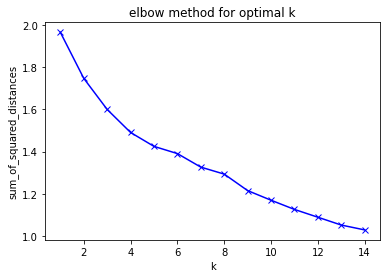

In [36]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(sanfran_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

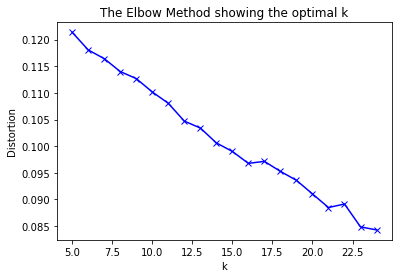

In [37]:
# Elbow Method (Distortions) function
distortions = []
K = range(5,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sanfran_data_grouped_clustering)
    kmeanModel.fit(sanfran_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(sanfran_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sanfran_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=3).fit(sanfran_data_grouped_clustering)

In [39]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([3, 3, 3, 1, 1, 3, 3, 2, 0, 0, 3, 4, 3, 3, 3, 0, 4, 3, 3, 3, 0, 3,
       1, 1, 4, 1, 0, 0, 3, 3, 1, 0, 0, 0, 3, 0, 0, 3, 3, 5, 0, 3, 4, 1,
       3, 3, 3, 0, 3, 4, 1, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1,
       3, 0, 0, 0, 3, 4, 3, 3, 1, 0, 1, 0, 3, 3, 3, 1, 3, 3, 4, 3, 1, 0,
       3, 4, 0, 3])

In [40]:
sf_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sf_neighborhoods_venues_sorted.head()

Cluster Labels     Neighborhood 1st Most Common Venue  \
0               3     Alamo Square      Sushi Restaurant   
1               3       Anza Vista                Bakery   
2               3   Balboa Terrace           Coffee Shop   
3               1          Bayview                  Park   
4               1  Bayview Heights                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop        Ice Cream Shop          Cocktail Bar   
1      Sushi Restaurant    Mexican Restaurant                  Café   
2                Bakery                  Park            Playground   
3         Grocery Store         Deli / Bodega            Campground   
4                  Café           Coffee Shop                Bakery   

  5th Most Common Venue      6th Most Common Venue     7th Most Common Venue  \
0    Italian Restaurant   Mediterranean Restaurant                      Park   
1                  Park        American Restaurant   New American Restaurant   
2           Pizza Place        Japanese Restaurant      Gym / Fitness Center   
3          Home Service         Mexican Restaurant                      Food   
4          Burger Joint                 Food Truck            Sandwich Place   

         8th Most Common Venue 9th Most Common Venue  \
0                     Dive Bar           Pizza Place   
1      Health & Beauty Service                   Gym   
2                          Gym        Cosmetics Shop   
3            Food & Drink Shop          Soccer Field   
4   Construction & Landscaping                Bistro   

        10th Most Common Venue  
0              Bubble Tea Shop  
1         Gym / Fitness Center  
2           Chinese Restaurant  
3   Construction & Landscaping  
4                      Brewery

In [41]:
# merge toronto_grouped with sanfran_data to add latitude/longitude for each neighborhood
sanfran_data_merged = sanfran_data

sanfran_data_merged = sanfran_data_merged.join(sf_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(sanfran_data_merged.shape)
sanfran_data_merged

(93, 17)


Neighborhood   Longitude   Latitude  \
0                       Alamo Square -122.434465  37.776566   
1                         Anza Vista -122.443353  37.781006   
2                     Balboa Terrace -122.468460  37.731391   
3                            Bayview -122.385272  37.720777   
4                    Bayview Heights -122.396834  37.719529   
5                     Bernal Heights -122.416410  37.739840   
6   Buena Vista Park/Ashbury Heights -122.441887  37.767965   
7                  Candlestick Point -122.386528  37.713579   
8                   Central Richmond -122.482131  37.778232   
9                     Central Sunset -122.486262  37.758480   
10       Central Waterfront/Dogpatch -122.386370  37.757000   
11                 Clarendon Heights -122.448908  37.758409   
12     Cole Valley/Parnassus Heights -122.451886  37.763860   
13                    Corona Heights -122.440378  37.763279   
14                        Cow Hollow -122.436000  37.798053   
15                    Crocker Amazon -122.439009  37.711805   
16                   Diamond Heights -122.442887  37.742935   
17                          Downtown -122.411989  37.788739   
18                   Duboce Triangle -122.432415  37.767129   
19   Eureka Valley / Dolores Heights -122.433270  37.758838   
20                         Excelsior -122.428695  37.720891   
21  Financial District/Barbary Coast -122.401800  37.794343   
22                       Forest Hill -122.463518  37.747800   
23            Forest Hills Extension -122.458085  37.744180   
24                     Forest Knolls -122.458378  37.756672   
25                         Glen Park -122.434344  37.736989   
26               Golden Gate Heights -122.469700  37.751380   
27                  Golden Gate Park -122.481981  37.769018   
28                    Haight Ashbury -122.449797  37.770118   
29                      Hayes Valley -122.424961  37.775078   
30                     Hunters Point -122.372919  37.726249   
31                         Ingleside -122.455466  37.720858   
32                 Ingleside Heights -122.467533  37.713809   
33                 Ingleside Terrace -122.468298  37.725077   
34                     Inner Mission -122.413559  37.758369   
35                    Inner Parkside -122.473535  37.744599   
36                    Inner Richmond -122.465523  37.779165   
37                      Inner Sunset -122.468301  37.760598   
38      Jordan Park / Laurel Heights -122.452722  37.784153   
39                        Lake Shore -122.493160  37.720945   
40                       Lake Street -122.473449  37.785737   
41                          Lakeside -122.473808  37.726869   
42                      Lincoln Park -122.503662  37.784600   
43                      Lincoln Park -122.503662  37.784600   
44                  Little Hollywood -122.399575  37.710896   
45                     Lone Mountain -122.453024  37.778396   
46             Lower Pacific Heights -122.435392  37.786318   
47                            Marina -122.437035  37.803572   
48                    Merced Heights -122.467543  37.719772   
49                      Merced Manor -122.478490  37.732898   
50                   Midtown Terrace -122.452287  37.750839   
51                     Miraloma Park -122.450954  37.739196   
52                       Mission Bay -122.390829  37.770344   
53                   Mission Dolores -122.425045  37.764220   
54                   Mission Terrace -122.439529  37.725273   
55                  Monterey Heights -122.461200  37.732690   
56              Mount Davidson Manor -122.463339  37.728147   
57                          Nob Hill -122.415422  37.794000   
58                        Noe Valley -122.431711  37.748737   
59                       North Beach -122.411867  37.802098   
60                   North Panhandle -122.441995  37.776442   
61                  North Waterfront -122.409163  37.807361   
62                         Oceanview -122.457739  37.71

In [42]:

#List Cluster Labels as type integer. Check Dataframe Shape
sanfran_data_merged['Cluster Labels']=sanfran_data_merged['Cluster Labels'].astype(int)
print(sanfran_data_merged.shape)

(93, 17)


In [43]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('San Francisco, California')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sanfran_data_merged['Latitude'], sanfran_data_merged['Longitude'], sanfran_data_merged['Neighborhood'], sanfran_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 0, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels   1st Most Common Venue  \
8       Central Richmond       94121               0                    Café   
9         Central Sunset       94122               0      Chinese Restaurant   
15        Crocker Amazon       94112               0            Liquor Store   
20             Excelsior       94112               0      Mexican Restaurant   
26   Golden Gate Heights       94116               0      Chinese Restaurant   
27      Golden Gate Park       94122               0                    Park   
31             Ingleside       94112               0        Asian Restaurant   
32     Ingleside Heights       94132               0     Rental Car Location   
33     Ingleside Terrace       94127               0     Japanese Restaurant   
35        Inner Parkside       94116               0      Chinese Restaurant   
36        Inner Richmond       94118               0                  Bakery   
40           Lake Street       94118               0      Chinese Restaurant   
48        Merced Heights       94132               0              Playground   
54       Mission Terrace       94112               0      Mexican Restaurant   
55      Monterey Heights       94127               0             Coffee Shop   
56  Mount Davidson Manor       94127               0        Asian Restaurant   
62             Oceanview       94112               0      Chinese Restaurant   
63         Outer Mission       94112               0             Pizza Place   
64        Outer Parkside       94116               0          Baseball Field   
65        Outer Richmond       94121               0      Chinese Restaurant   
68              Parkside       94116               0      Chinese Restaurant   
69        Pine Lake Park       94132               0      Chinese Restaurant   
70               Portola       94134               0      Chinese Restaurant   
76             Sea Cliff       94121               0                    Café   
78        Silver Terrace       94124               0   Vietnamese Restaurant   
88           West Portal       94127               0      Chinese Restaurant   
91         Westwood Park       94112               0        Asian Restaurant   

     2nd Most Common Venue             3rd Most Common Venue  \
8       Chinese Restaurant                     Grocery Store   
9    Vietnamese Restaurant                   Bubble Tea Shop   
15             Pizza Place             Vietnamese Restaurant   
20   Vietnamese Restaurant         Latin American Restaurant   
26                    Park                          Bus Stop   
27         Bubble Tea Shop             Vietnamese Restaurant   
31      Chinese Restaurant                              Café   
32            Intersection                      Liquor Store   
33                  Bakery                Mexican Restaurant   
35             Pizza Place                  Sushi Restaurant   
36      Chinese Restaurant                  Sushi Restaurant   
40                  Bakery                              Café   
48             Pizza Place                              Café   
54                    Park                       Pizza Place   
55                Pharmacy                Chinese Restaurant   
56     Japanese Restaurant                Chinese Restaurant   
62            Intersection                            Bakery   
63             Coffee Shop                Mexican Restaurant   
64             Zoo Exhibit                Chinese Restaurant   
65                    Café                          Bus Stop   
68                    Park               Dumpling Restaurant   
69                    Park                    Sandwich Place   
70                    Park                     Grocery Store   
76        Sushi Restaurant                Chinese Restaurant   
78           Grocery Store   Southern / Soul Food Restaurant   
88                    Park                  Sushi Restaurant   
91     Japanese Restaurant                 

In [45]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 1, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
3                  Bayview       94124               1                  Park   
4          Bayview Heights       94124               1                  Park   
22             Forest Hill       94116               1                 Trail   
23  Forest Hills Extension       94127               1            Playground   
25               Glen Park       94131               1                  Park   
30           Hunters Point       94124               1                  Park   
44        Little Hollywood       94134               1                  Park   
51           Miraloma Park       94127               1                  Park   
66            Outer Sunset       94122               1    Light Rail Station   
75      Saint Francis Wood       94127               1                  Park   
77         Sherwood Forest       94127               1                  Park   
82               Sunnyside       94112               1                  Park   
87       Visitacion Valley       94134               1           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3          Grocery Store         Deli / Bodega            Campground   
4                   Café           Coffee Shop                Bakery   
22            Playground          Burger Joint                  Park   
23           Coffee Shop          Burger Joint              Bus Stop   
25    Italian Restaurant                  Café                Bakery   
30       Harbor / Marina     Outdoor Sculpture       Motorcycle Shop   
44           Coffee Shop                  Café         Grocery Store   
51           Bus Station           Pizza Place              Mountain   
66                  Café           Art Gallery           Coffee Shop   
75           Coffee Shop            Playground    Italian Restaurant   
77           Coffee Shop                  Café           Pizza Place   
82              Bus Line         Grocery Store        Baseball Field   
87                  Café         Grocery Store                  Park   

         5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3                 Home Service    Mexican Restaurant                  Food   
4                 Burger Joint            Food Truck        Sandwich Place   
22                 Coffee Shop                   Gym         Grocery Store   
23                       Trail    Mexican Restaurant        Sandwich Place   
25   Latin American Restaurant            Playground           Coffee Shop   
30                Home Service                   Spa           Art Gallery   
44           Convenience Store    Light Rail Station                Bistro   
51                    Bus Stop              Bus Line                 Trail   
66           Convenience Store    Chinese Restaurant         Grocery Store   
75          Mexican Restaurant          Burger Joint                Bakery   
77                Burger Joint              Pharmacy           Yoga Studio   
82               Deli / Bodega      Asian Restaurant           Coffee Shop   
87              Sandwich Place        Baseball Field    Light Rail Station   

          8th Most Common Venue   9th Most Common Venue  \
3             Food & Drink Shop            Soccer Field   
4    Construction & Landscaping                  Bistro   
22           Mexican Restaurant          Sandwich Place   
23           Italian Restaurant           Grocery Store   
25                  Gas Station           Grocery Store   
30            Food & Drink Shop           Grocery Store   
44                        Motel    Cantonese Restaurant   
51                         Café           Grocery Store   
66           Miscellaneous Shop         Thai Restaurant   
75                         Bank   Vietnamese Restaurant   
77                     Bus Line          Sandwich Place   
82                  Bus Station          Breakfast Spot   
87   Construction & Land

In [46]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 2, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
7  Candlestick Point                           2                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
7   American Restaurant      Football Stadium                Bistro   

  5th Most Common Venue     6th Most Common Venue 7th Most Common Venue  \
7                  Café   State / Provincial Park               Stadium   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
7            Campground          Soccer Field      Food & Drink Shop

In [47]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 3, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
0                       Alamo Square       94117               3   
1                         Anza Vista       94115               3   
2                     Balboa Terrace       94127               3   
5                     Bernal Heights       94110               3   
6   Buena Vista Park/Ashbury Heights       94117               3   
10       Central Waterfront/Dogpatch       94107               3   
12     Cole Valley/Parnassus Heights       94117               3   
13                    Corona Heights       94114               3   
14                        Cow Hollow       94123               3   
17                          Downtown       94102               3   
18                   Duboce Triangle       94114               3   
19   Eureka Valley / Dolores Heights       94114               3   
21  Financial District/Barbary Coast       94111               3   
28                    Haight Ashbury       94117               3   
29                      Hayes Valley       94102               3   
34                     Inner Mission       94110               3   
37                      Inner Sunset       94122               3   
38      Jordan Park / Laurel Heights       94118               3   
41                          Lakeside       94132               3   
45                     Lone Mountain       94118               3   
46             Lower Pacific Heights       94115               3   
47                            Marina       94123               3   
49                      Merced Manor       94132               3   
52                       Mission Bay       94158               3   
53                   Mission Dolores       94110               3   
57                          Nob Hill       94109               3   
58                        Noe Valley       94114               3   
59                       North Beach       94133               3   
60                   North Panhandle       94117               3   
61                  North Waterfront       94133               3   
67                   Pacific Heights       94115               3   
71                      Potrero Hill       94107               3   
73                  Presidio Heights       94118               3   
74                      Russian Hill       94109               3   
79                       South Beach       94107               3   
80                   South of Market       94103               3   
81                        Stonestown       94132               3   
83                    Telegraph Hill       94133               3   
84                        Tenderloin       94102               3   
86             Van Ness/Civic Center       94109               3   
89                  Western Addition       94115               3   
92                       Yerba Buena       94105               3   

    1st Most Common Venue     2nd Most Common Venue    3rd Most Common Venue  \
0        Sushi Restaurant               Coffee Shop           Ice Cream Shop   
1                  Bakery          Sushi Restaurant       Mexican Restaurant   
2             Coffee Shop                    Bakery                     Park   
5      Mexican Restaurant               Coffee Shop       Italian Restaurant   
6                    Park               Coffee Shop           Ice Cream Shop   
10   Gym / Fitness Center                      Café                  Brewery   
12                   Park                  Boutique           Breakfast Spot   
13                Gay Bar               Coffee Shop                     Park   
14         Cosmetics Shop                  Wine Bar       Italian Restaurant   
17           Cocktail Bar                     Hotel              Coffee Shop   
18            Coffee Shop                   Gay Bar              Pizza Place   
19                Gay Bar               Coffee Shop                   Bakery   
21            Coffee Shop   New American Restaurant        

In [48]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 4, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
11   Clarendon Heights       94114               4                 Trail   
16     Diamond Heights       94131               4                  Park   
24       Forest Knolls       94131               4                 Trail   
42        Lincoln Park       94121               4                 Trail   
43        Lincoln Park                           4                 Trail   
50     Midtown Terrace       94131               4                 Trail   
72            Presidio       94129               4                 Trail   
85          Twin Peaks       94131               4                 Trail   
90  Westwood Highlands       94127               4                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
11                  Park        Scenic Lookout            Playground   
16            Playground                 Trail           Coffee Shop   
24            Playground           Coffee Shop                  Park   
42        Scenic Lookout                  Park   Monument / Landmark   
43        Scenic Lookout                  Park   Monument / Landmark   
50        Scenic Lookout              Bus Stop                  Park   
72           Golf Course                  Park            Food Truck   
85        Scenic Lookout                  Park            Playground   
90              Bus Line           Bus Station              Mountain   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
11      Convenience Store                  Café   Monument / Landmark   
16         Scenic Lookout              Pharmacy         Grocery Store   
24     Light Rail Station           Salad Place        Sandwich Place   
42                  Beach         Historic Site                  Café   
43                  Beach         Historic Site                  Café   
50            Art Gallery    Light Rail Station      Sushi Restaurant   
72                 Tunnel                  Café        Scenic Lookout   
85                   Café             Gift Shop    Italian Restaurant   
90   Cantonese Restaurant                 Trail   Monument / Landmark   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
11      Mexican Restaurant        Breakfast Spot               Wine Bar  
16      Athletics & Sports       Thai Restaurant         Sandwich Place  
24             Art Gallery      Sushi Restaurant                 Garden  
42                Pharmacy                 Motel           Liquor Store  
43                Pharmacy                 Motel           Liquor Store  
50          Sandwich Place               Theater            Event Space  
72   General Entertainment        Baseball Field    American Restaurant  
85     American Restaurant                  Hill            Yoga Studio  
90           Grocery Store                  Tree                   Café

In [49]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 5, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
39   Lake Shore       94132               5                 Trail   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
39                  Lake           Golf Course                  Park   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
39             Gun Range         Historic Site   American Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
39              Gym Pool     College Cafeteria            Pizza Place

## K-Means Clustering (Chicago)

### Check for Optimal K (elbow Method)

In [50]:
# Remove column 'Neighborhood' from grouped data
chicago_data_grouped_clustering = chicago_data_grouped.drop('Neighborhood', 1)

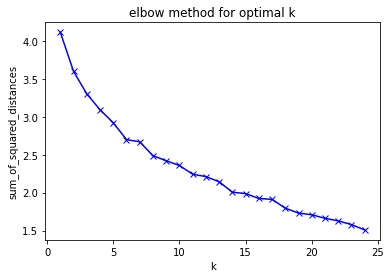

In [51]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,25)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(chicago_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

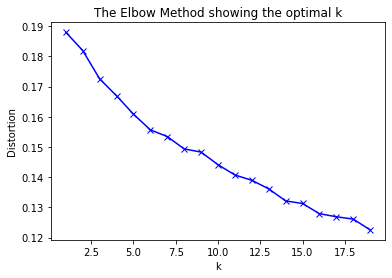

In [52]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(chicago_data_grouped_clustering)
    kmeanModel.fit(chicago_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(chicago_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / chicago_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [53]:
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=2).fit(chicago_data_grouped_clustering)

In [54]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([ 1,  3,  6,  3,  0,  1,  1,  1,  3,  6,  3,  3,  3,  1,  3,  1,  1,
        1,  1,  3,  3,  1,  3,  6,  3,  3,  3,  1,  0,  6,  3,  1,  3,  2,
        1,  1,  2,  3,  9,  6,  1,  3,  3,  2,  3,  3,  3,  3,  3,  3,  6,
        3,  2,  6,  2,  1,  2,  1,  1,  0,  3,  3,  1,  3,  1,  3,  1,  3,
        8,  3,  3,  3,  7,  3,  4,  3,  1,  2,  1,  3, 10,  5,  3,  2,  3,
        3,  3,  1,  1,  6,  6,  3, 10,  1,  3,  3,  1,  3])

In [55]:
chi_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
chi_neighborhoods_venues_sorted.head()

Cluster Labels    Neighborhood 1st Most Common Venue  \
0               1     Albany Park    Mexican Restaurant   
1               3   Andersonville           Coffee Shop   
2               6  Archer Heights    Mexican Restaurant   
3               3   Armour Square      Baseball Stadium   
4               0         Ashburn                  Park   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
0         Discount Store             Donut Shop    Chinese Restaurant   
1       Sushi Restaurant         Breakfast Spot      Asian Restaurant   
2      Mobile Phone Shop   Fast Food Restaurant         Grocery Store   
3                    Bar     Chinese Restaurant   American Restaurant   
4   Fast Food Restaurant    Fried Chicken Joint   American Restaurant   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0      Fried Chicken Joint            Taco Place                  Park   
1            Grocery Store                Bakery        Sandwich Place   
2   Transportation Service                Bakery   Arts & Crafts Store   
3           Sandwich Place        Baseball Field           Coffee Shop   
4                Locksmith        Clothing Store    Mexican Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0     Korean Restaurant            Hookah Bar      Mobile Phone Shop  
1                  Café    Mexican Restaurant     Salon / Barbershop  
2        Clothing Store    Recycling Facility    Rental Car Location  
3         Grocery Store           Pizza Place             Sports Bar  
4                  Bank         Hot Dog Joint                  Field

In [56]:
# merge toronto_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_data_merged = chicago_data

chicago_data_merged = chicago_data_merged.join(chi_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(chicago_data_merged.shape)
chicago_data_merged

(103, 17)


Neighborhood  Longitude   Latitude  \
0              Albany Park -87.721560  41.968068   
1            Andersonville -87.667865  41.979854   
2           Archer Heights -87.726363  41.810880   
3            Armour Square -87.633222  41.836091   
4                  Ashburn -87.708365  41.745757   
5           Auburn Gresham -87.656307  41.744205   
6                   Austin -87.758010  41.890650   
7              Avalon Park -87.586349  41.744200   
8                 Avondale -87.711211  41.938666   
9           Belmont Cragin -87.765502  41.927261   
10                 Beverly -87.675075  41.713150   
11                Boystown -87.647447  41.943924   
12              Bridgeport -87.648788  41.836151   
13           Brighton Park -87.698861  41.817367   
14                Bucktown -87.678785  41.921687   
15                Burnside -87.596476  41.728182   
16         Calumet Heights -87.572718  41.729676   
17                 Chatham -87.615970  41.740206   
18            Chicago Lawn -87.695666  41.771849   
19               Chinatown -87.635186  41.851733   
20               Chinatown -87.635186  41.851733   
21                Clearing -87.768511  41.779581   
22                 Douglas -87.618678  41.835118   
23                 Dunning -87.806020  41.946511   
24               East Side -87.534902  41.707314   
25            East Village -87.672275  41.899630   
26            East Village -87.672275  41.899630   
27               Edgewater -87.662320  41.988403   
28             Edison Park -87.813781  42.007613   
29               Englewood -87.654706  41.776556   
30             Fuller Park -87.632425  41.809085   
31               Gage Park -87.696435  41.795431   
32                Galewood -87.792795  41.914187   
33           Garfield Park -87.715659  41.878786   
34          Garfield Ridge -87.769625  41.792592   
35              Gold Coast -87.627104  41.906006   
36         Grand Boulevard -87.617860  41.812949   
37          Grand Crossing -87.616134  41.763247   
38              Grant Park -87.620837  41.874298   
39               Greektown -87.647127  41.878545   
40               Hegewisch -87.540715  41.663671   
41                 Hermosa -87.734740  41.924348   
42           Humboldt Park -87.716507  41.900889   
43               Hyde Park -87.593914  41.794825   
44             Irving Park -87.723452  41.953582   
45            Jackson Park -87.579953  41.781854   
46          Jefferson Park -87.771167  41.978830   
47                 Kenwood -87.596184  41.808916   
48               Lake View -87.663088  41.939786   
49            Lincoln Park -87.635810  41.925409   
50            Lincoln Park -87.635810  41.925409   
51          Lincoln Square -87.690439  41.972233   
52          Lincoln Square -87.690439  41.972233   
53       Little Italy, UIC -87.667757  41.867539   
54          Little Village -87.714002  41.839087   
55            Logan Square -87.707389  41.923193   
56                    Loop -87.629331  41.880979   
57         Lower West Side -87.674844  41.848386   
58        Magnificent Mile -87.624188  41.894784   
59           Mckinley Park -87.672503  41.829922   
60          Millenium Park -87.620379  41.882774   
61               Montclare -87.798040  41.929313   
62             Morgan Park -87.669054  41.689730   
63         Mount Greenwood -87.713192  41.694879   
64           Museum Campus -87.616713  41.863032   
65         Near South Side -87.623892  41.856296   
66                New City -87.659167  41.809019   
67            North Center -87.683835  41.947792   
68          North Lawndale -87.717219  41.860190   
69              North Park -87.723583  41.983636   
70            Norwood Park -87.804531  41.985015   
71                  O'Hare -87.913647  41.980240   
72                 Oakland -87.602389  41.823775   
73                Old Town -87.639784  41.911370   
74            Portage Park -87.763400  41.954028   
75            Printers Row -87.629035  41.870981   
76        

In [57]:

#List Cluster Labels as type integer. Check Dataframe Shape
chicago_data_merged['Cluster Labels']=chicago_data_merged['Cluster Labels'].astype(int)
print(chicago_data_merged.shape)

(103, 17)


In [58]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('Chicago, Illinois')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_data_merged['Latitude'], chicago_data_merged['Longitude'], chicago_data_merged['Neighborhood'], chicago_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [59]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 0, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
4           Ashburn       60652               0                  Park   
30      Fuller Park       60609               0                  Park   
63  Mount Greenwood       60655               0                  Park   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4    Fast Food Restaurant   Fried Chicken Joint   American Restaurant   
30   Fast Food Restaurant         Train Station            Restaurant   
63               Dive Bar        Breakfast Spot    Mexican Restaurant   

   5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
4              Locksmith        Clothing Store     Mexican Restaurant   
30           Bus Station        Baseball Field         Sandwich Place   
63             Gift Shop          Intersection   Gym / Fitness Center   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
4                   Bank         Hot Dog Joint                  Field  
30           Pizza Place                Bakery    American Restaurant  
63         Tanning Salon                   Bar             Food Truck

In [60]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 1, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  1st Most Common Venue  \
0              Albany Park       60625               1     Mexican Restaurant   
5           Auburn Gresham       60620               1    American Restaurant   
6                   Austin       60644               1         Sandwich Place   
7              Avalon Park       60619               1   Fast Food Restaurant   
13           Brighton Park       60632               1     Seafood Restaurant   
15                Burnside       60619               1   Fast Food Restaurant   
16         Calumet Heights       60617               1   Fast Food Restaurant   
17                 Chatham       60619               1   Fast Food Restaurant   
18            Chicago Lawn       60629               1   Fast Food Restaurant   
22                 Douglas       60616               1         Sandwich Place   
29               Englewood       60636               1   Fast Food Restaurant   
33           Garfield Park       60624               1       Botanical Garden   
36         Grand Boulevard       60653               1              BBQ Joint   
37          Grand Crossing       60619               1    American Restaurant   
42           Humboldt Park       60651               1             Donut Shop   
59           Mckinley Park       60609               1     Chinese Restaurant   
61               Montclare       60707               1             Shoe Store   
62             Morgan Park       60643               1              BBQ Joint   
66                New City       60609               1     Mexican Restaurant   
68          North Lawndale       60623               1   Fast Food Restaurant   
70            Norwood Park       60631               1                   Park   
80                Roseland       60628               1         Discount Store   
82   Sauganash,Forest Glen       60646               1                   Park   
91      Washington Heights       10033               1         Sandwich Place   
92      Washington Heights       60643               1         Sandwich Place   
93         Washington Park       60637               1   Fast Food Restaurant   
98              West Ridge       60645               1      Indian Restaurant   
101               Woodlawn       60637               1                   Park   

     2nd Most Common Venue  3rd Most Common Venue  \
0           Discount Store             Donut Shop   
5            Grocery Store      Currency Exchange   
6           Discount Store          Grocery Store   
7                 Pharmacy          Hot Dog Joint   
13              Donut Shop         Sandwich Place   
15            Liquor Store    Rental Car Location   
16       Mobile Phone Shop         Sandwich Place   
17          Discount Store     Chinese Restaurant   
18      Mexican Restaurant    American Restaurant   
22    Fast Food Restaurant                   Park   
29          Cosmetics Shop     Seafood Restaurant   
33    Fast Food Restaurant          Train Station   
36                    Park   Fast Food Restaurant   
37    Fast Food Restaurant    Fried Chicken Joint   
42                    Park          Grocery Store   
59              Donut Shop           Soccer Field   
61           Grocery Store   Fast Food Restaurant   
62     American Restaurant                    Gym   
66          Discount Store            Pizza Place   
68           Movie Theater                   Food   
70             Pizza Place    American Restaurant   
80          Sandwich Place           Liquor Store   
82          Sandwich Place   Fast Food Restaurant   
91     Fried Chicken Joint         Cosmetics Shop   
92     Fried Chicken Joint         Cosmetics Shop   
93     Fried Chicken Joint           Intersection   
98           Grocery Store   Pakistani Restaurant   
101           Intersection            Coffee Shop   

                4th Most Common Venue  5th Most Common Venue  \
0                  Chinese Restaurant    Fried Chicken Joint  

In [61]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 2, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
35        Gold Coast       60610               2                 Hotel   
38        Grant Park       60605               2                  Park   
45      Jackson Park       60637               2                  Park   
56              Loop       60603               2                 Hotel   
58  Magnificent Mile       60611               2                 Hotel   
60    Millenium Park       60603               2                 Hotel   
81   Rush & Division       60610               2                 Hotel   
87     Streeterville       60611               2   American Restaurant   

   2nd Most Common Venue     3rd Most Common Venue 4th Most Common Venue  \
35   American Restaurant        Italian Restaurant           Coffee Shop   
38           Coffee Shop                     Hotel           Pizza Place   
45        Science Museum           Harbor / Marina     Outdoor Sculpture   
56            Steakhouse                      Park               Theater   
58   American Restaurant   New American Restaurant    Italian Restaurant   
60               Theater                      Park              Fountain   
81   American Restaurant                Steakhouse    Italian Restaurant   
87                 Hotel   New American Restaurant        Breakfast Spot   

         5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
35                         Gym                  Café            Steakhouse   
38         American Restaurant          Burger Joint            Art Museum   
45          Golf Driving Range           Bus Station                 Track   
56         American Restaurant           Coffee Shop           Snack Place   
58                        Café            Donut Shop    Seafood Restaurant   
60   Middle Eastern Restaurant                Museum   American Restaurant   
81     New American Restaurant              Boutique         Women's Store   
87                 Pizza Place            Donut Shop                  Park   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
35                    Bar             Hotel Bar           Cycle Studio  
38         History Museum                Garden          Hot Dog Joint  
45     Athletics & Sports           Golf Course          Train Station  
56                    Pub    Italian Restaurant               Fountain  
58          Grocery Store        Cosmetics Shop            Coffee Shop  
60     Seafood Restaurant             Hotel Bar                 Garden  
81   Gym / Fitness Center                   Gym            Coffee Shop  
87     Italian Restaurant      Toy / Game Store          Shopping Mall

In [62]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 3, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels   1st Most Common Venue  \
1         Andersonville       60640               3             Coffee Shop   
3         Armour Square       60616               3        Baseball Stadium   
8              Avondale       60618               3      Mexican Restaurant   
10              Beverly       60643               3             Pizza Place   
11             Boystown       60657               3          Sandwich Place   
12           Bridgeport       60608               3      Chinese Restaurant   
14             Bucktown       60647               3                     Bar   
19            Chinatown       60616               3      Chinese Restaurant   
20            Chinatown       10002               3      Chinese Restaurant   
21             Clearing       60638               3              Restaurant   
23              Dunning       60634               3          Clothing Store   
25         East Village       60622               3      Mexican Restaurant   
26         East Village       10009               3      Mexican Restaurant   
27            Edgewater       60660               3        Asian Restaurant   
28          Edison Park       60631               3      Italian Restaurant   
32             Galewood       60707               3      Mexican Restaurant   
34       Garfield Ridge       60638               3             Pizza Place   
39            Greektown       60661               3             Coffee Shop   
43            Hyde Park       60615               3               Bookstore   
44          Irving Park       60618               3             Bus Station   
46       Jefferson Park       60630               3             Pizza Place   
47              Kenwood       60615               3             Pizza Place   
48            Lake View       60657               3                     Bar   
49         Lincoln Park       94121               3             Zoo Exhibit   
50         Lincoln Park                           3             Zoo Exhibit   
51       Lincoln Square       60625               3                     Bar   
52       Lincoln Square       10023               3                     Bar   
53    Little Italy, UIC       60608               3      Italian Restaurant   
55         Logan Square       60647               3             Coffee Shop   
64        Museum Campus       60605               3                Aquarium   
65      Near South Side       60616               3      Chinese Restaurant   
67         North Center       60618               3                     Bar   
69           North Park       60646               3             Bus Station   
71               O'Hare       60666               3             Coffee Shop   
73             Old Town       60614               3                     Gym   
74         Portage Park       60641               3      Italian Restaurant   
75         Printers Row       60605               3             Coffee Shop   
77          River North       60610               3                     Gym   
79          Rogers Park       60626               3      Mexican Restaurant   
83   Sheffield & DePaul       60614               3             Coffee Shop   
86          South Shore       60649               3      Chinese Restaurant   
88    Ukrainian Village       60622               3                     Bar   
89        United Center       60612               3             Bus Station   
90               Uptown       60640               3   Vietnamese Restaurant   
96            West Loop       60607               3      Italian Restaurant   
99            West Town       60642               3             Coffee Shop   
100         Wicker Park       60622               3             Pizza Place   
102        Wrigleyville       60613               3             Pizza Place   

        2nd Most Common Venue  3rd Most Common Venue  \
1            Sushi Restaurant         Breakfast Spot   
3                         B

In [63]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 4, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
78    Riverdale       60628               4                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
78                  Food         Grocery Store           Zoo Exhibit   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
78           Fabric Shop     Electronics Store   Empanada Restaurant   

   8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
78           Escape Room   Ethiopian Restaurant            Event Space

In [64]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 5, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
85  South Deering       60617               5            Bike Trail   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
85                  Park        Waste Facility           Zoo Exhibit   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
85    Falafel Restaurant     Electronics Store   Empanada Restaurant   

   8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
85           Escape Room   Ethiopian Restaurant            Event Space

In [65]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 6, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
2    Archer Heights       60632               6    Mexican Restaurant   
9    Belmont Cragin       60639               6    Mexican Restaurant   
24        East Side       60617               6    Mexican Restaurant   
31        Gage Park       60632               6    Mexican Restaurant   
41          Hermosa       60639               6    Mexican Restaurant   
54   Little Village       60623               6    Mexican Restaurant   
57  Lower West Side       60608               6    Mexican Restaurant   
94      West Elsdon       60629               6    Mexican Restaurant   
95        West Lawn       60629               6    Mexican Restaurant   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
2      Mobile Phone Shop   Fast Food Restaurant         Grocery Store   
9             Donut Shop         Sandwich Place              Pharmacy   
24       Harbor / Marina                    Bar           Pizza Place   
31         Grocery Store           Intersection           Video Store   
41        Discount Store   Fast Food Restaurant           Pizza Place   
54           Bus Station                   Bank    Chinese Restaurant   
57         Grocery Store     Italian Restaurant                  Park   
94           Pizza Place         Ice Cream Shop           Video Store   
95        Ice Cream Shop   Fast Food Restaurant    Italian Restaurant   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
2    Transportation Service                Bakery   Arts & Crafts Store   
9      Fast Food Restaurant    Chinese Restaurant        Ice Cream Shop   
24     Fast Food Restaurant     Convenience Store           Supermarket   
31        Convenience Store              Pharmacy                Bakery   
41         Cuban Restaurant     Mobile Phone Shop            Donut Shop   
54            Grocery Store     Mobile Phone Shop        Ice Cream Shop   
57                      Bar           Pizza Place        Sandwich Place   
94                     Park           Gas Station        Discount Store   
95             Liquor Store            Donut Shop        Sandwich Place   

    8th Most Common Venue    9th Most Common Venue   10th Most Common Venue  
2          Clothing Store       Recycling Facility      Rental Car Location  
9           Grocery Store   Thrift / Vintage Store       Athletics & Sports  
24             Taco Place                     Park            Train Station  
31         Sandwich Place              Coffee Shop               Taco Place  
41         Sandwich Place              Supermarket   Thrift / Vintage Store  
54   Fast Food Restaurant               Restaurant               Donut Shop  
57          Deli / Bodega              Gas Station       Chinese Restaurant  
94          Grocery Store       Seafood Restaurant                     Bank  
95     Chinese Restaurant          Automotive Shop           Discount Store

In [66]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 7, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
76      Pullman       60628               7   Fried Chicken Joint   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
76                  Park        History Museum      Football Stadium   

   5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
76   American Restaurant         Train Station   Gym / Fitness Center   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
76        Discount Store        Clothing Store            Zoo Exhibit

In [67]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 8, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
72      Oakland       60653               8                  Park   

   2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
72                 Beach             BBQ Joint   Health & Beauty Service   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
72   Performing Arts Venue      Basketball Court        Discount Store   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
72                 Track            Restaurant              Rest Area

In [68]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 9, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels     1st Most Common Venue  \
40    Hegewisch       60633               9   State / Provincial Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
40          Fishing Spot        Baseball Field    Chinese Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
40   American Restaurant    Falafel Restaurant   Empanada Restaurant   

   8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
40           Escape Room   Ethiopian Restaurant            Event Space

In [69]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 10, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels        1st Most Common Venue  \
84  South Chicago       60617              10           Mexican Restaurant   
97   West Pullman       60628              10   Construction & Landscaping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
84         Train Station         Grocery Store                   ATM   
97         Train Station        Clothing Store        Discount Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
84   American Restaurant                  Park          Burger Joint   
97                  Park          Burger Joint                  Bank   

               8th Most Common Venue  9th Most Common Venue  \
84   Southern / Soul Food Restaurant   Marijuana Dispensary   
97                     Grocery Store      Convenience Store   

   10th Most Common Venue  
84      Convenience Store  
97               Heliport

In [70]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 11, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Empty DataFrame
Columns: [Neighborhood, Postal Code, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

## K-Means Clustering (Toronto)

### Check for Optimal K (elbow Method)

In [71]:
# Remove column 'Neighborhood' from grouped data
toronto_data_grouped_clustering = toronto_data_grouped.drop('Neighborhood', 1)

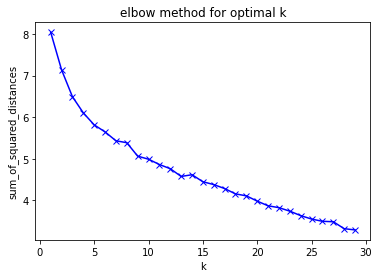

In [72]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(toronto_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

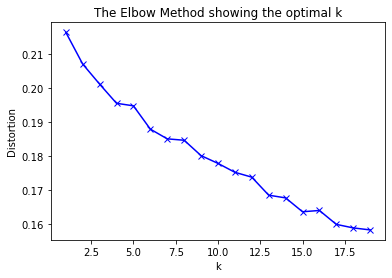

In [73]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(toronto_data_grouped_clustering)
    kmeanModel.fit(toronto_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(toronto_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / toronto_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [74]:
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=2).fit(toronto_data_grouped_clustering)

In [75]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([ 6,  5,  9,  0,  0, 10,  0, 10, 10,  9,  6, 10, 10,  6,  0,  6,  0,
        0,  6,  0,  6,  0,  1,  0,  6,  9,  9,  0,  0,  0, 10,  6,  0,  9,
        0,  0,  8,  9,  6,  6,  9,  9,  0,  9,  0,  9,  0, 10,  6,  0,  0,
        7,  6,  9,  9,  6,  9,  6,  6,  0,  6,  6,  0,  6,  0,  6, 10,  8,
        0,  0,  0,  0,  0,  9,  6,  9,  5,  0, 10,  0,  9,  9,  0,  0,  0,
        0,  8,  0,  0,  0,  9,  9,  9, 10,  0,  6,  0,  0, 10, 10,  0,  6,
       10,  0, 10,  2,  0,  6,  6,  0,  0,  3,  5,  4,  6,  9,  0, 10,  0,
        0,  0,  0,  0,  9,  6,  8,  0,  0,  9,  0,  8,  9,  6,  0,  0,  0,
        0,  0,  9,  6])

In [76]:
tor_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
tor_neighborhoods_venues_sorted.head()

Cluster Labels                  Neighborhood 1st Most Common Venue  \
0               6               Agincourt North    Chinese Restaurant   
1               5  Agincourt South-Malvern West    Chinese Restaurant   
2               9                     Alderwood           Gas Station   
3               0                         Annex           Coffee Shop   
4               0             Banbury-Don Mills            Restaurant   

  2nd Most Common Venue  3rd Most Common Venue   4th Most Common Venue  \
0                Bakery      Indian Restaurant   Vietnamese Restaurant   
1            Restaurant   Cantonese Restaurant        Asian Restaurant   
2        Discount Store            Pizza Place                    Park   
3    Italian Restaurant                   Café              Restaurant   
4           Coffee Shop                   Café             Pizza Place   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0              Pharmacy        Discount Store           Coffee Shop   
1         Shopping Mall   Sporting Goods Shop           Supermarket   
2              Pharmacy        Sandwich Place           Coffee Shop   
3                Bakery     French Restaurant         Grocery Store   
4   Japanese Restaurant                  Bank              Pharmacy   

         8th Most Common Venue           9th Most Common Venue  \
0               Sandwich Place                            Bank   
1            Korean Restaurant                    Noodle House   
2   Construction & Landscaping               Convenience Store   
3          Japanese Restaurant   Vegetarian / Vegan Restaurant   
4             Botanical Garden                    Gourmet Shop   

  10th Most Common Venue  
0            Pizza Place  
1                 Lounge  
2                   Pool  
3              Gastropub  
4   Caribbean Restaurant

In [77]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_data_merged = toronto_data

toronto_data_merged = toronto_data_merged.join(tor_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(toronto_data_merged.shape)
toronto_data_merged

(140, 17)


Neighborhood  Longitude   Latitude Borough  \
0                        Agincourt North -79.266712  43.805441     NaN   
1           Agincourt South-Malvern West -79.265612  43.788658     NaN   
2                              Alderwood -79.541611  43.604937     NaN   
3                                  Annex -79.404001  43.671585     NaN   
4                      Banbury-Don Mills -79.349718  43.737657     NaN   
5                         Bathurst Manor -79.456055  43.764813     NaN   
6                    Bay Street Corridor -79.385721  43.657511     NaN   
7                        Bayview Village -79.377117  43.776361     NaN   
8                  Bayview Woods-Steeles -79.382118  43.796802     NaN   
9                   Bedford Park-Nortown -79.420227  43.731486     NaN   
10               Beechborough-Greenbrook -79.479473  43.693216     NaN   
11                               Bendale -79.257400  43.760366     NaN   
12                 Birchcliffe-Cliffside -79.265093  43.694682     NaN   
13                           Black Creek -79.521979  43.764890     NaN   
14                           Blake-Jones -79.337394  43.676173     NaN   
15                  Briar Hill-Belgravia -79.452851  43.699024     NaN   
16     Bridle Path-Sunnybrook-York Mills -79.378904  43.731013     NaN   
17                       Broadview North -79.355630  43.688825     NaN   
18                   Brookhaven-Amesbury -79.485589  43.701326     NaN   
19      Cabbagetown-South St. James Town -79.366107  43.667648     NaN   
20                    Caledonia-Fairbank -79.455212  43.688569     NaN   
21                             Casa Loma -79.408007  43.681852     NaN   
22                Centennial Scarborough -79.150843  43.782376     NaN   
23                 Church-Yonge Corridor -79.379017  43.659649     NaN   
24                   Clairlea-Birchmount -79.281382  43.713592     NaN   
25                          Clanton Park -79.446303  43.741978     NaN   
26                            Cliffcrest -79.235530  43.721121     NaN   
27                Corso Italia-Davenport -79.447469  43.677661     NaN   
28                              Danforth -79.329819  43.684025     NaN   
29                    Danforth East York -79.331403  43.689468     NaN   
30                    Don Valley Village -79.353644  43.783294     NaN   
31                           Dorset Park -79.278908  43.759274     NaN   
32   Dovercourt-Wallace Emerson-Junction -79.438541  43.665677     NaN   
33                  Downsview-Roding-CFB -79.490497  43.733292     NaN   
34                        Dufferin Grove -79.437341  43.655428     NaN   
35                     East End-Danforth -79.299359  43.684174     NaN   
36              Edenbridge-Humber Valley -79.522458  43.670886     NaN   
37                         Eglinton East -79.245598  43.740922     NaN   
38                      Elms-Old Rexdale -79.548983  43.721519     NaN   
39                   Englemount-Lawrence -79.437409  43.720345     NaN   
40        Eringate-Centennial-West Deane -79.580445  43.658017     NaN   
41                   Etobicoke West Mall -79.568939  43.645063     NaN   
42                       Flemingdon Park -79.332646  43.715930     NaN   
43                     Forest Hill North -79.428143  43.704218     NaN   
44                     Forest Hill South -79.414318  43.694526     NaN   
45                Glenfield-Jane Heights -79.513465  43.745636     NaN   
46                     Greenwood-Coxwell -79.324318  43.672612     NaN   
47                             Guildwood -79.195055  43.748829     NaN   
48                            Henry Farm -79.341241  43.771144     NaN   
49                       High Park North -79.466302  43.657565     NaN   
50                     High Park-Swansea -79.467872  43.645065     NaN   
51                        Highland Creek -79.177472  43.790775     NaN   
52                     Hillcrest Village -79.354804  43.802988     NaN   
53              Humber Heights-W

In [78]:

#List Cluster Labels as type integer. Check Dataframe Shape
toronto_data_merged['Cluster Labels']=toronto_data_merged['Cluster Labels'].astype(int)
print(toronto_data_merged.shape)

(140, 17)


In [79]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('Toronto, Ontario')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_data_merged['Latitude'], toronto_data_merged['Longitude'], toronto_data_merged['Neighborhood'], toronto_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [80]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 0, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
3                                  Annex         M5R               0   
4                      Banbury-Don Mills         M3B               0   
6                    Bay Street Corridor         M5G               0   
14                           Blake-Jones         M4J               0   
16     Bridle Path-Sunnybrook-York Mills         M3C               0   
17                       Broadview North         M4K               0   
19      Cabbagetown-South St. James Town         M4X               0   
21                             Casa Loma         M5R               0   
23                 Church-Yonge Corridor         M5B               0   
27                Corso Italia-Davenport         M6E               0   
28                              Danforth         M4J               0   
29                    Danforth East York         M4J               0   
32   Dovercourt-Wallace Emerson-Junction         M6H               0   
34                        Dufferin Grove         M6H               0   
35                     East End-Danforth         M4E               0   
42                       Flemingdon Park         M3C               0   
44                     Forest Hill South         M5P               0   
46                     Greenwood-Coxwell         M4L               0   
49                       High Park North         M6P               0   
50                     High Park-Swansea         M6S               0   
59                         Junction Area         M6P               0   
62                  Kensington-Chinatown         M5T               0   
64                        Kingsway South         M8X               0   
68                   Lawrence Park North         M4N               0   
69                   Lawrence Park South         M4R               0   
70                    Leaside-Bennington         M4G               0   
71                       Little Portugal         M6K               0   
72                           Long Branch         M8W               0   
77                                Mimico         M8Z               0   
79                             Moss Park         M5A               0   
82                   Mount Pleasant East         M4S               0   
83                   Mount Pleasant West         M4S               0   
84                           New Toronto         M8V               0   
85                      Newtonbrook East         M2M               0   
87                               Niagara         M6K               0   
88                       North Riverdale         M4K               0   
89                  North St. James Town         M4X               0   
94               Palmerston-Little Italy         M6G               0   
96                  Pelmo Park-Humberlea         M9M               0   
97              Playter Estates-Danforth         M4K               0   
100                          Regent Park         M5A               0   
103                         Roncesvalles         M6R               0   
106         Runnymede-Bloor West Village         M6S               0   
109                       South Parkdale         M6K               0   
110                      South Riverdale                           0   
116                          The Beaches         M4L               0   
118                     Thorncliffe Park         M4H               0   
119                    Trinity-Bellwoods         M6J               0   
120                           University         M5S               0   
121                     Victoria Village         M4A               0   
122    Waterfront Communities-The Island                           0   
126                               Weston         M9N               0   
127                   Weston-Pellam Park         M6N               0   
129                      Willowdale East         M2N               0   
133                    Woodbine Corridor         M4L               0

In [81]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 1, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
22  Centennial Scarborough         M1C               1                   Bar   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
22                  Park                  Pool            Playground   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
22                   Gym   Fast Food Restaurant     Elementary School   

   8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
22           Escape Room   Ethiopian Restaurant            Event Space

In [82]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 2, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
105        Rouge         M1B               2           Zoo Exhibit   

    2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
105                   Zoo   Other Great Outdoors          Dessert Shop   

    5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
105          Tram Station     Accessories Store   Financial or Legal Service   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
105           Event Space    Falafel Restaurant                   Farm

In [83]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 3, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
111  St.Andrew-Windfields         M2L               3                  Park   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
111        Baseball Field                  Pool   Filipino Restaurant   

    5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
111           Escape Room   Ethiopian Restaurant           Event Space   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
111    Falafel Restaurant                  Farm         Farmers Market

In [84]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 4, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
113  Stonegate-Queensway         M8Y               4    Italian Restaurant   

    2nd Most Common Venue         3rd Most Common Venue  \
113        Ice Cream Shop   Eastern European Restaurant   

     4th Most Common Venue 5th Most Common Venue  6th Most Common Venue  \
113   Gym / Fitness Center   Filipino Restaurant   Ethiopian Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
113           Event Space    Falafel Restaurant                  Farm   

    10th Most Common Venue  
113         Farmers Market

In [85]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 5, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
1    Agincourt South-Malvern West         M1S               5   
76                       Milliken         M1V               5   
112                       Steeles         M1W               5   

    1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
1      Chinese Restaurant            Restaurant    Cantonese Restaurant   
76               Pharmacy                  Park      Chinese Restaurant   
112    Chinese Restaurant              Tea Room   Vietnamese Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1        Asian Restaurant         Shopping Mall   Sporting Goods Shop   
76                  Trail                Bakery    Dim Sum Restaurant   
112           Supermarket           Gas Station   Szechuan Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1             Supermarket     Korean Restaurant          Noodle House   
76         Discount Store            Restaurant             BBQ Joint   
112    Dim Sum Restaurant      Ramen Restaurant             BBQ Joint   

    10th Most Common Venue  
1                   Lounge  
76    Cantonese Restaurant  
112   Hong Kong Restaurant

In [86]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 6, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
0                  Agincourt North         M1S               6   
10         Beechborough-Greenbrook         M6M               6   
13                     Black Creek         M3N               6   
15            Briar Hill-Belgravia         M6E               6   
18             Brookhaven-Amesbury         M6M               6   
20              Caledonia-Fairbank         M6E               6   
24             Clairlea-Birchmount         M1L               6   
31                     Dorset Park         M1P               6   
38                Elms-Old Rexdale         M9W               6   
39             Englemount-Lawrence         M6A               6   
48                      Henry Farm         M2J               6   
52               Hillcrest Village         M2H               6   
55                      Humbermede         M9M               6   
57                         Ionview         M1K               6   
58      Islington-City Centre West         M9B               6   
60        Keelesdale-Eglinton West         M6M               6   
61                    Kennedy Park         M1K               6   
63   Kingsview Village-The Westway         M9P               6   
65                      L'Amoreaux         M1W               6   
74                      Maple Leaf         M6L               6   
95               Parkwoods-Donalda         M3A               6   
101                Rexdale-Kipling         M9W               6   
107                         Rustic         M6L               6   
108            Scarborough Village         M1M               6   
114         Tam O'Shanter-Sullivan         M1T               6   
124         West Humber-Clairville         M9W               6   
132                         Woburn         M1H               6   
139             Yorkdale-Glen Park         M6A               6   

      1st Most Common Venue    2nd Most Common Venue    3rd Most Common Venue  \
0        Chinese Restaurant                   Bakery        Indian Restaurant   
10              Coffee Shop   Furniture / Home Store             Dessert Shop   
13            Grocery Store              Gas Station             Liquor Store   
15              Coffee Shop   Furniture / Home Store                     Park   
18    Portuguese Restaurant              Coffee Shop       Athletics & Sports   
20                     Park                 Bus Stop            Grocery Store   
24                    Diner           Ice Cream Shop                   Bakery   
31        Electronics Store   Furniture / Home Store        Indian Restaurant   
38        Convenience Store      Fried Chicken Joint                Pet Store   
39              Coffee Shop     Fast Food Restaurant                   Bakery   
48           Clothing Store              Coffee Shop      Japanese Restaurant   
52       Chinese Restaurant           Sandwich Place              Coffee Shop   
55    Vietnamese Restaurant     Fast Food Restaurant         Asian Restaurant   
57       Chinese Restaurant              Coffee Shop                     Bank   
58              Coffee Shop     Fast Food Restaurant                 Pharmacy   
60           Discount Store                   Bakery                     Park   
61              Coffee Shop     Fast Food Restaurant       Chinese Restaurant   
63              Coffee Shop              Pizza Place                     Bank   
65       Chinese Restaurant     Fast Food Restaurant              Pizza Place   
74     Fast Food Restaurant              Coffee Shop   Furniture / Home Store   
95        Food & Drink Shop              Supermarket             Tennis Court   
101             Coffee Shop     Fast Food Restaurant           Discount Store   
107             Gas Station    Vietnamese Restaurant              Pizza Place   
108             Coffee Shop     Fast Food Restaurant        Indian Restaurant   
114                Pharmacy              Coffee Shop     Fast Food Restaurant   
1

In [87]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 7, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
51  Highland Creek         M1C               7          Burger Joint   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
51        Breakfast Spot                   Gym    Italian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
51          Neighborhood     Fish & Chips Shop           Zoo Exhibit   

          8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
51   Financial or Legal Service    Falafel Restaurant                   Farm

In [88]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 8, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
36   Edenbridge-Humber Valley         M9A               8   
67           Lansing-Westgate         M2N               8   
86           Newtonbrook West         M2R               8   
125       Westminster-Branson         M2R               8   
130           Willowdale West         M2N               8   

    1st Most Common Venue     2nd Most Common Venue 3rd Most Common Venue  \
36                   Park                    Bakery     Electronics Store   
67                   Park                  Ski Area            Ski Chalet   
86                   Park               Summer Camp          Skating Rink   
125                  Park                    Bakery           Pizza Place   
130                  Park   Health & Beauty Service           Coffee Shop   

         4th Most Common Venue 5th Most Common Venue  \
36                    Bus Line     Convenience Store   
67            Community Center                   Spa   
86                 Zoo Exhibit                 Field   
125                       Bank         Shopping Mall   
130   Mediterranean Restaurant           Zoo Exhibit   

            6th Most Common Venue  7th Most Common Venue  \
36                         Garden               Bus Stop   
67                        Dog Run            Zoo Exhibit   
86                    Escape Room   Ethiopian Restaurant   
125   Eastern European Restaurant           Skating Rink   
130                         Field            Escape Room   

     8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
36            Skating Rink                  Field            Event Space  
67    Fast Food Restaurant   Ethiopian Restaurant            Event Space  
86             Event Space     Falafel Restaurant                   Farm  
125            Coffee Shop          Grocery Store               Pharmacy  
130   Ethiopian Restaurant            Event Space     Falafel Restaurant

In [89]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 9, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
2                            Alderwood         M8W               9   
9                 Bedford Park-Nortown         M5M               9   
25                        Clanton Park         M3H               9   
26                          Cliffcrest         M1M               9   
33                Downsview-Roding-CFB         M3M               9   
37                       Eglinton East         M1J               9   
40      Eringate-Centennial-West Deane         M9C               9   
41                 Etobicoke West Mall         M9C               9   
43                   Forest Hill North         M6C               9   
45              Glenfield-Jane Heights         M3L               9   
53            Humber Heights-Westmount         M9P               9   
54                       Humber Summit         M9L               9   
56                  Humewood-Cedarvale         M6C               9   
73                             Malvern                           9   
75                       Markland Wood         M9C               9   
80                        Mount Dennis         M6M               9   
81   Mount Olive-Silverstone-Jamestown         M9V               9   
90                   O'Connor-Parkview         M4B               9   
91                            Oakridge         M1L               9   
92                     Oakwood Village         M6E               9   
115                      Taylor-Massey         M4C               9   
123                          West Hill         M1E               9   
128                   Wexford/Maryvale         M1R               9   
131   Willowridge-Martingrove-Richview         M9R               9   
138            York University Heights         M3J               9   

          1st Most Common Venue  2nd Most Common Venue  \
2                   Gas Station         Discount Store   
9                   Pizza Place            Coffee Shop   
25                Deli / Bodega            Pizza Place   
26               Ice Cream Shop            Pizza Place   
33                Grocery Store         Baseball Field   
37                     Pharmacy         Ice Cream Shop   
40               Baseball Field      Convenience Store   
41               Sandwich Place            Pizza Place   
43                         Bank            Pizza Place   
45            Food & Drink Shop            Pizza Place   
53                         Bank            Pizza Place   
54                  Pizza Place   Gym / Fitness Center   
56                   Restaurant            Pizza Place   
73                  Pizza Place   Fast Food Restaurant   
75            Convenience Store                   Bank   
80                  Pizza Place            Coffee Shop   
81                Grocery Store            Pizza Place   
90         Gym / Fitness Center                 Bakery   
91                         Bank                    Gym   
92                  Pizza Place                   Park   
115               Grocery Store                   Bank   
123                 Pizza Place                   Park   
128   Middle Eastern Restaurant            Pizza Place   
131                Liquor Store            Pizza Place   
138                 Pizza Place            Coffee Shop   

       3rd Most Common Venue       4th Most Common Venue  \
2                Pizza Place                        Park   
9         Italian Restaurant            Sushi Restaurant   
25      Other Great Outdoors                         Gym   
26                    Bistro              Hardware Store   
33                       Spa                        Park   
37             Grocery Store              Sandwich Place   
40               Pizza Place              Sandwich Place   
41               Coffee Shop                   Pet Store   
43                Restaurant                 Coffee Shop   
45                      Bank               Shopping Mall   
53               Gas Station        

In [90]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 10, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
5                  Bathurst Manor         M3H              10   
7                 Bayview Village         M2K              10   
8           Bayview Woods-Steeles         M2H              10   
11                        Bendale         M1P              10   
12          Birchcliffe-Cliffside         M1N              10   
30             Don Valley Village         M2J              10   
47                      Guildwood         M1E              10   
66             Lambton Baby Point         M6S              10   
78                    Morningside         M1E              10   
93                  Old East York         M4J              10   
98                  Pleasant View         M2J              10   
99             Princess-Rosethorn         M9B              10   
102             Rockcliffe-Smythe         M6N              10   
104           Rosedale-Moore Park         M4W              10   
117  Thistletown-Beaumond Heights         M9V              10   

    1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
5                    Park         Baseball Field          Grocery Store   
7                    Park               Pharmacy          Deli / Bodega   
8                    Park                   Bank     Chinese Restaurant   
11                   Park      Indian Restaurant   Fast Food Restaurant   
12                   Park               Gym Pool        College Stadium   
30         Clothing Store                   Park   Fast Food Restaurant   
47                   Park          Grocery Store          Train Station   
66                   Park                    ATM                  River   
78            Coffee Shop                   Park               Pharmacy   
93                   Park                    Pub        Thai Restaurant   
98                   Park   Fast Food Restaurant               Pharmacy   
99                   Park              Locksmith         Clothing Store   
102                  Park            Coffee Shop           Hockey Arena   
104                  Park     Italian Restaurant                    Spa   
117     Indian Restaurant                   Park   Caribbean Restaurant   

       4th Most Common Venue    5th Most Common Venue  6th Most Common Venue  \
5                 Sports Bar   Furniture / Home Store      Convenience Store   
7        Sporting Goods Shop              Fish Market         Breakfast Spot   
8          Recreation Center                     Café            Pizza Place   
11                    Bakery       Chinese Restaurant           Optical Shop   
12                      Café               Restaurant                  Diner   
30         Convenience Store              Coffee Shop             Restaurant   
47                     Hotel                 Bus Line       Storage Facility   
66       Sporting Goods Shop            Metro Station                   Café   
78         Mobile Phone Shop               Beer Store      Convenience Store   
93          Greek Restaurant    Performing Arts Venue         Breakfast Spot   
98                      Bank              Bus Station           Skating Rink   
99        Athletics & Sports               Playground   Gym / Fitness Center   
102   Furniture / Home Store              Supermarket             Beer Store   
104                     Café             Gourmet Shop              Juice Bar   
117         Asian Restaurant                 Pharmacy            Pizza Place   

      7th Most Common Venue  8th Most Common Venue  9th Most Common Venue  \
5            Breakfast Spot             Playground            Men's Store   
7             Metro Station   Fast Food Restaurant            Gas Station   
8       Japanese Restaurant         Sandwich Place            Gas Station   
11              Coffee Shop   Caribbean Restaurant                Dog Run   
12    General Entertainment           Skating Rink      Convenience Store   
30         Toy / Game Store         

In [91]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 11, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Empty DataFrame
Columns: [Neighborhood, Postal Code, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

## K-Means Clustering

### Check for Optimal K (elbow Method)

In [92]:
# Remove column 'Neighborhood' from grouped data
manhattan_data_grouped_clustering = manhattan_data_grouped.drop('Neighborhood', 1)

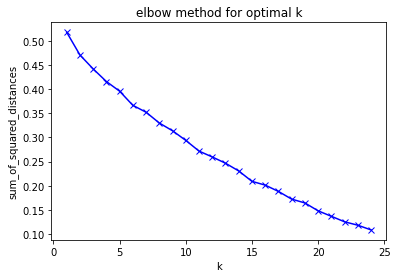

In [93]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,25)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(manhattan_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

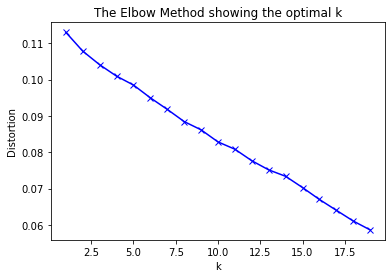

In [94]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(manhattan_data_grouped_clustering)
    kmeanModel.fit(manhattan_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(manhattan_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / manhattan_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [95]:
# set number of clusters
kclusters = 13

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=2).fit(manhattan_data_grouped_clustering)

In [96]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([ 6,  2,  4,  0, 12,  2,  2,  5,  8,  6, 11,  4,  9,  4,  2,  5,  1,
       10,  9, 12,  3,  4,  5, 11, 11,  4, 11, 12,  3,  9,  8,  2,  2,  3,
        3,  7,  1,  5,  4,  1])

In [97]:
man_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
man_neighborhoods_venues_sorted.head()

Cluster Labels       Neighborhood             1st Most Common Venue  \
0               6  Battery Park City                              Park   
1               2      Carnegie Hill                       Coffee Shop   
2               4     Central Harlem   Southern / Soul Food Restaurant   
3               0            Chelsea                       Art Gallery   
4              12          Chinatown                    Ice Cream Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop                 Hotel                 Plaza   
1                  Café                Bakery           Yoga Studio   
2                  Café    African Restaurant      Sushi Restaurant   
3           Coffee Shop                Bakery    Italian Restaurant   
4                  Café        Sandwich Place    Chinese Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                  Café   American Restaurant           Pizza Place   
1                   Gym             Bookstore          Cocktail Bar   
2                   Bar                Lounge           Pizza Place   
3   American Restaurant              Beer Bar                  Park   
4              Wine Bar          Cocktail Bar                Bakery   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0   Gym / Fitness Center        Sandwich Place                    Gym  
1             Art Museum           Pizza Place      French Restaurant  
2      French Restaurant          Cocktail Bar     Seafood Restaurant  
3           Cupcake Shop    Salon / Barbershop           Cycle Studio  
4           Optical Shop           Coffee Shop                    Spa

In [98]:
# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_data_merged = manhattan_data

manhattan_data_merged = manhattan_data_merged.join(man_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(manhattan_data_merged.shape)
manhattan_data_merged

(44, 17)


Neighborhood  Longitude   Latitude    Borough  \
0     Battery Park City -74.016869  40.711932  Manhattan   
1         Carnegie Hill -73.953256  40.782683  Manhattan   
2        Central Harlem -73.943211  40.815976  Manhattan   
3               Chelsea -74.003116  40.744035  Manhattan   
4             Chinatown -73.994279  40.715618  Manhattan   
5             Chinatown -73.994279  40.715618  Manhattan   
6          Civic Center -74.005415  40.715229  Manhattan   
7               Clinton -73.996119  40.759101  Manhattan   
8           East Harlem -73.944182  40.792249  Manhattan   
9          East Village -73.982226  40.727847  Manhattan   
10         East Village -73.982226  40.727847  Manhattan   
11   Financial District -74.010665  40.707107  Manhattan   
12             Flatiron -73.990947  40.739673  Manhattan   
13             Gramercy -73.981376  40.737210  Manhattan   
14    Greenwich Village -73.999914  40.726933  Manhattan   
15     Hamilton Heights -73.949688  40.823604  Manhattan   
16         Hudson Yards -74.000111  40.756658  Manhattan   
17               Inwood -73.921210  40.867684  Manhattan   
18           Lenox Hill -73.958860  40.768113  Manhattan   
19       Lincoln Square -73.985338  40.773529  Manhattan   
20       Lincoln Square -73.985338  40.773529  Manhattan   
21         Little Italy -73.997305  40.719324  Manhattan   
22      Lower East Side -73.980890  40.717807  Manhattan   
23     Manhattan Valley -73.964286  40.797307  Manhattan   
24       Manhattanville -73.957385  40.816934  Manhattan   
25          Marble Hill -73.910660  40.876551  Manhattan   
26              Midtown -73.981669  40.754691  Manhattan   
27        Midtown South -73.988713  40.748510  Manhattan   
28  Morningside Heights -73.963896  40.808000  Manhattan   
29          Murray Hill -73.978332  40.748303  Manhattan   
30                 Noho -73.988434  40.723259  Manhattan   
31     Roosevelt Island -73.949168  40.762160  Manhattan   
32                 Soho -74.000657  40.722184  Manhattan   
33      Stuyvesant Town -73.974052  40.731000  Manhattan   
34         Sutton Place -73.963556  40.760280  Manhattan   
35              Tribeca -74.010683  40.721522  Manhattan   
36           Tudor City -73.971219  40.746917  Manhattan   
37           Turtle Bay -73.967708  40.752042  Manhattan   
38      Upper East Side -73.960508  40.775639  Manhattan   
39      Upper West Side -73.977059  40.787658  Manhattan   
40   Washington Heights -73.936900  40.851903  Manhattan   
41   Washington Heights -73.936900  40.851903  Manhattan   
42         West Village -74.006180  40.734434  Manhattan   
43            Yorkville -73.947118  40.775930  Manhattan   

                       City Postal Code  Cluster Labels  \
0   New York City, New York                           6   
1   New York City, New York       10128               2   
2   New York City, New York       10030               4   
3   New York City, New York       10011               0   
4   New York City, New York       60616              12   
5   New York City, New York       10002              12   
6   New York City, New York       10278               2   
7   New York City, New York       10036               2   
8   New York City, New York       10029               5   
9   New York City, New York       60622               8   
10  New York City, New York       10009               8   
11  New York City, New York       10005               6   
12  New York City, New York       10011              11   
13  New York City, New York       10010               4   
14  New York City, New York       10012               9   
15  New York City, New York       10031               4   
16  New York City, New York       10018               2   
17  New York City, New York       10034               5   
18  New York City, New York       10021               1   
19  New York City, New York       60625              10   
20  New York City, New York       10023              10   
21  New York

In [99]:

#List Cluster Labels as type integer. Check Dataframe Shape
manhattan_data_merged['Cluster Labels']=manhattan_data_merged['Cluster Labels'].astype(int)
print(manhattan_data_merged.shape)

(44, 17)


In [100]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('Manhattan, New York')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_data_merged['Latitude'], manhattan_data_merged['Longitude'], manhattan_data_merged['Neighborhood'], manhattan_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [101]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 0, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
3      Chelsea       10011               0           Art Gallery   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3           Coffee Shop                Bakery    Italian Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3   American Restaurant              Beer Bar                  Park   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
3          Cupcake Shop    Salon / Barbershop           Cycle Studio

In [102]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 1, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
18       Lenox Hill       10021               1    Italian Restaurant   
39  Upper West Side       10024               1    Italian Restaurant   
43        Yorkville       10028               1                   Gym   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
18      Sushi Restaurant           Coffee Shop                   Gym   
39           Coffee Shop                  Park                   Gym   
43    Italian Restaurant           Coffee Shop        Ice Cream Shop   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
18   Gym / Fitness Center              Wine Bar           Pizza Place   
39                   Café        Ice Cream Shop     Indian Restaurant   
43            Pizza Place    Mexican Restaurant                   Bar   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
18          Burger Joint          Cycle Studio                   Café  
39              Wine Bar                   Bar    American Restaurant  
43         Deli / Bodega            Bagel Shop                 Bakery

In [103]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 2, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  1st Most Common Venue  \
1   Carnegie Hill       10128               2            Coffee Shop   
6    Civic Center       10278               2            Coffee Shop   
7         Clinton       10036               2            Coffee Shop   
16   Hudson Yards       10018               2                Theater   
34   Sutton Place       10022               2   Gym / Fitness Center   
35        Tribeca       10013               2                   Park   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
1                   Café                 Bakery           Yoga Studio   
6                  Hotel                   Café          Cocktail Bar   
7                Theater              Wine Shop    Italian Restaurant   
16                 Hotel   Gym / Fitness Center           Coffee Shop   
34    Italian Restaurant                   Park                 Hotel   
35                 Hotel    American Restaurant    Italian Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1                     Gym             Bookstore          Cocktail Bar   
6       French Restaurant           Men's Store   American Restaurant   
7    Gym / Fitness Center   American Restaurant          Cocktail Bar   
16     Italian Restaurant                   Gym                Lounge   
34                    Gym                   Spa          Cycle Studio   
35            Coffee Shop                   Spa          Cocktail Bar   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1             Art Museum           Pizza Place      French Restaurant  
6     Italian Restaurant                Bakery                    Spa  
7                    Gym          Burger Joint                  Hotel  
16          Cocktail Bar         Indie Theater           Dance Studio  
34     Indian Restaurant           Coffee Shop     Salon / Barbershop  
35                  Café           Men's Store             Playground

In [104]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 3, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
23  Manhattan Valley       10025               3           Coffee Shop   
31  Roosevelt Island       10044               3                  Park   
36        Tudor City       10016               3           Coffee Shop   
37        Turtle Bay       10017               3           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
23                  Park         Grocery Store        Ice Cream Shop   
31           Coffee Shop      Sushi Restaurant      Greek Restaurant   
36         Grocery Store          Burger Joint                  Café   
37      Sushi Restaurant                  Park     Indian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
23     Indian Restaurant    Chinese Restaurant    Mexican Restaurant   
31          Tennis Court           Pizza Place    Italian Restaurant   
36      Sushi Restaurant           Pizza Place   Japanese Restaurant   
37     French Restaurant   Japanese Restaurant              Wine Bar   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
23            Playground               Dog Run    Peruvian Restaurant  
31                 Hotel          Cocktail Bar          Deli / Bodega  
36                   Gym                   Pub           Gourmet Shop  
37      Greek Restaurant          Burger Joint        Bubble Tea Shop

In [105]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 4, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
2        Central Harlem       10030               4   
13             Gramercy       10010               4   
15     Hamilton Heights       10031               4   
24       Manhattanville       10027               4   
28  Morningside Heights       10027               4   
42         West Village       10014               4   

               1st Most Common Venue 2nd Most Common Venue  \
2    Southern / Soul Food Restaurant                  Café   
13               American Restaurant     Indian Restaurant   
15                       Coffee Shop                  Park   
24                              Park    Italian Restaurant   
28                       Coffee Shop                  Park   
42                Italian Restaurant   American Restaurant   

   3rd Most Common Venue     4th Most Common Venue 5th Most Common Venue  \
2     African Restaurant          Sushi Restaurant                   Bar   
13                  Park   New American Restaurant           Coffee Shop   
15    Mexican Restaurant                      Café                   Bar   
24    Mexican Restaurant        Seafood Restaurant   American Restaurant   
28   American Restaurant        Italian Restaurant    Chinese Restaurant   
42              Wine Bar                      Park           Coffee Shop   

   6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
2                 Lounge            Pizza Place     French Restaurant   
13             Juice Bar     Italian Restaurant    Mexican Restaurant   
15           Yoga Studio   Ethiopian Restaurant      Sushi Restaurant   
24    Chinese Restaurant            Coffee Shop                  Café   
28    Mexican Restaurant              Bookstore            Playground   
42          Cocktail Bar             Steakhouse           Pizza Place   

        9th Most Common Venue    10th Most Common Venue  
2                Cocktail Bar        Seafood Restaurant  
13   Mediterranean Restaurant            Cosmetics Shop  
15         Chinese Restaurant             Deli / Bodega  
24          Indian Restaurant             Historic Site  
28              Grocery Store                    Bakery  
42                     Bakery   New American Restaurant

In [106]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 5, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
8          East Harlem       10029               5   
17              Inwood       10034               5   
25         Marble Hill       10463               5   
40  Washington Heights       10033               5   
41  Washington Heights       60643               5   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
8           Mexican Restaurant                  Café                Bakery   
17   Latin American Restaurant    Mexican Restaurant              Wine Bar   
25                 Pizza Place                  Park    Mexican Restaurant   
40                 Pizza Place                  Café                Bakery   
41                 Pizza Place                  Café                Bakery   

         4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
8                Deli / Bodega           Pizza Place          Cocktail Bar   
17               Deli / Bodega                  Café                Lounge   
25          Spanish Restaurant                  Café           Coffee Shop   
40   Latin American Restaurant                  Park    Mexican Restaurant   
41   Latin American Restaurant                  Park    Mexican Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
8        Thai Restaurant                 Plaza           Coffee Shop   
17    Spanish Restaurant            Restaurant                Bakery   
25            Donut Shop           Bus Station        Sandwich Place   
40           Coffee Shop    Spanish Restaurant                   Bar   
41           Coffee Shop    Spanish Restaurant                   Bar   

   10th Most Common Venue  
8                Fountain  
17                   Park  
25          Deli / Bodega  
40       Tapas Restaurant  
41       Tapas Restaurant

In [107]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 6, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
0    Battery Park City                           6                  Park   
11  Financial District       10005               6           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Coffee Shop                 Hotel                 Plaza   
11           Pizza Place                 Hotel          Cocktail Bar   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                   Café   American Restaurant           Pizza Place   
11         Memorial Site                  Café                  Park   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0    Gym / Fitness Center        Sandwich Place                    Gym  
11    American Restaurant    Falafel Restaurant             Steakhouse

In [108]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 7, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
38  Upper East Side       10075               7               Exhibit   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
38    Italian Restaurant           Coffee Shop                Bakery   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
38   Gym / Fitness Center                 Hotel   American Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
38           Yoga Studio            Playground      Outdoor Sculpture

In [109]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 8, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
9      East Village       60622               8              Wine Bar   
10     East Village       10009               8              Wine Bar   
33  Stuyvesant Town       10009               8                   Bar   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
9            Coffee Shop          Cocktail Bar        Ice Cream Shop   
10           Coffee Shop          Cocktail Bar        Ice Cream Shop   
33           Pizza Place          Cocktail Bar                  Park   

   5th Most Common Venue 6th Most Common Venue   7th Most Common Venue  \
9                    Bar           Pizza Place   Vietnamese Restaurant   
10                   Bar           Pizza Place   Vietnamese Restaurant   
33           Coffee Shop   American Restaurant      Italian Restaurant   

             8th Most Common Venue 9th Most Common Venue  \
9    Vegetarian / Vegan Restaurant   Japanese Restaurant   
10   Vegetarian / Vegan Restaurant   Japanese Restaurant   
33                          Bakery            Bagel Shop   

   10th Most Common Venue  
9            Dessert Shop  
10           Dessert Shop  
33              Juice Bar

In [110]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 9, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
14  Greenwich Village       10012               9    Italian Restaurant   
21       Little Italy       10013               9                 Hotel   
32               Soho       10012               9    Italian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
14           Pizza Place        Sandwich Place                   Gym   
21                  Café    Italian Restaurant        Sandwich Place   
32                  Café           Pizza Place        Clothing Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
14        Clothing Store                   Spa      Sushi Restaurant   
21        Clothing Store            Shoe Store           Pizza Place   
32        Cosmetics Shop           Coffee Shop                Bakery   

   8th Most Common Venue      9th Most Common Venue 10th Most Common Venue  
14           Coffee Shop                       Café     Seafood Restaurant  
21    Chinese Restaurant                     Bakery            Yoga Studio  
32        Sandwich Place   Mediterranean Restaurant            Men's Store

In [111]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 10, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
19  Lincoln Square       60625              10    Italian Restaurant   
20  Lincoln Square       10023              10    Italian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
19             Jazz Club               Theater           Coffee Shop   
20             Jazz Club               Theater           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
19     French Restaurant   Indie Movie Theater          Concert Hall   
20     French Restaurant   Indie Movie Theater          Concert Hall   

   8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
19                 Plaza   Performing Arts Venue                   Park  
20                 Plaza   Performing Arts Venue                   Park

In [112]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 11, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  1st Most Common Venue  \
12       Flatiron       10011              11   Gym / Fitness Center   
26        Midtown       10036              11                Theater   
27  Midtown South       10001              11      Korean Restaurant   
29    Murray Hill       10016              11      Korean Restaurant   

   2nd Most Common Venue     3rd Most Common Venue  4th Most Common Venue  \
12           Yoga Studio   New American Restaurant    American Restaurant   
26                 Plaza                     Hotel             Steakhouse   
27           Coffee Shop                     Hotel   Gym / Fitness Center   
29          Gourmet Shop                     Hotel            Coffee Shop   

   5th Most Common Venue  6th Most Common Venue      7th Most Common Venue  \
12      Toy / Game Store    Japanese Restaurant   Mediterranean Restaurant   
26   American Restaurant    Japanese Restaurant             Sandwich Place   
27    Italian Restaurant    Japanese Restaurant                       Café   
29                Bakery   Gym / Fitness Center                Pizza Place   

   8th Most Common Venue 9th Most Common Venue          10th Most Common Venue  
12                  Park                  Café                           Hotel  
26          Gourmet Shop         Women's Store                       Juice Bar  
27          Dessert Shop             Bookstore              Chinese Restaurant  
29   American Restaurant        Sandwich Place   Vegetarian / Vegan Restaurant

In [113]:
mrg_mast=pd.DataFrame(columns=columns)

In [114]:

merged_list=[sanfran_data_merged,chicago_data_merged,toronto_data_merged,manhattan_data_merged]

# Function to rename columns and add borough data to all dataframes in list df
for i in range(len(merged_list)):
    df1=merged_list[i]
    cols=df1.columns
    df1=df1.fillna(value=cols[0],axis='columns')
    mrg_mast=mrg_mast.append(df1)
    i = i + 1
    
master_merged=mrg_mast.reset_index(drop=True)    
master_merged

Neighborhood             1st Most Common Venue  \
0                           Alamo Square                  Sushi Restaurant   
1                             Anza Vista                            Bakery   
2                         Balboa Terrace                       Coffee Shop   
3                                Bayview                              Park   
4                        Bayview Heights                              Park   
5                         Bernal Heights                Mexican Restaurant   
6       Buena Vista Park/Ashbury Heights                              Park   
7                      Candlestick Point                              Park   
8                       Central Richmond                              Café   
9                         Central Sunset                Chinese Restaurant   
10           Central Waterfront/Dogpatch              Gym / Fitness Center   
11                     Clarendon Heights                             Trail   
12         Cole Valley/Parnassus Heights                              Park   
13                        Corona Heights                           Gay Bar   
14                            Cow Hollow                    Cosmetics Shop   
15                        Crocker Amazon                      Liquor Store   
16                       Diamond Heights                              Park   
17                              Downtown                      Cocktail Bar   
18                       Duboce Triangle                       Coffee Shop   
19       Eureka Valley / Dolores Heights                           Gay Bar   
20                             Excelsior                Mexican Restaurant   
21      Financial District/Barbary Coast                       Coffee Shop   
22                           Forest Hill                             Trail   
23                Forest Hills Extension                        Playground   
24                         Forest Knolls                             Trail   
25                             Glen Park                              Park   
26                   Golden Gate Heights                Chinese Restaurant   
27                      Golden Gate Park                              Park   
28                        Haight Ashbury                              Park   
29                          Hayes Valley                          Wine Bar   
30                         Hunters Point                              Park   
31                             Ingleside                  Asian Restaurant   
32                     Ingleside Heights               Rental Car Location   
33                     Ingleside Terrace               Japanese Restaurant   
34                         Inner Mission                Mexican Restaurant   
35                        Inner Parkside                Chinese Restaurant   
36                        Inner Richmond                            Bakery   
37                          Inner Sunset                            Garden   
38          Jordan Park / Laurel Heights                       Coffee Shop   
39                            Lake Shore                             Trail   
40                           Lake Street                Chinese Restaurant   
41                              Lakeside                            Bakery   
42                          Lincoln Park                             Trail   
43                          Lincoln Park                             Trail   
44                      Little Hollywood                              Park   
45                         Lone Mountain                              Park   
46                 Lower Pacific Heights                            Bakery   
47                                Marina              Gym / Fitness Center   
48                        Merced Heights                        Playground   
49                          Merced Manor                               Gym   
50                       Midtown Terrace          

In [115]:
data_mast=data_mast.sort_values('Neighborhood')
data_mast.head()

Neighborhood   Longitude   Latitude  \
0               Agincourt North  -79.266712  43.805441   
1  Agincourt South-Malvern West  -79.265612  43.788658   
2                  Alamo Square -122.434465  37.776566   
3                   Albany Park  -87.721560  41.968068   
4                     Alderwood  -79.541611  43.604937   

                      Borough                       City Postal Code  
0                         NaN            Toronto, Canada         M1S  
1                         NaN            Toronto, Canada         M1S  
2  District 6 - Central North  San Francisco, California       94117  
3      NORTH PARK,ALBANY PARK          Chicago, Illinois       60625  
4                         NaN            Toronto, Canada         M8W

In [116]:
master_clusters=data_mast.merge(master_merged.sort_values('Neighborhood'),on='Neighborhood',suffixes=("","y"))

In [117]:
master_clusters.shape

(440, 22)

In [118]:
cols=master_clusters.columns.tolist()
cols=cols[0:16]
master_clusters=master_clusters[cols]

In [119]:
master_clusters

Neighborhood   Longitude   Latitude  \
0                        Agincourt North  -79.266712  43.805441   
1           Agincourt South-Malvern West  -79.265612  43.788658   
2                           Alamo Square -122.434465  37.776566   
3                            Albany Park  -87.721560  41.968068   
4                              Alderwood  -79.541611  43.604937   
5                          Andersonville  -87.667865  41.979854   
6                                  Annex  -79.404001  43.671585   
7                             Anza Vista -122.443353  37.781006   
8                         Archer Heights  -87.726363  41.810880   
9                          Armour Square  -87.633222  41.836091   
10                               Ashburn  -87.708365  41.745757   
11                        Auburn Gresham  -87.656307  41.744205   
12                                Austin  -87.758010  41.890650   
13                           Avalon Park  -87.586349  41.744200   
14                              Avondale  -87.711211  41.938666   
15                        Balboa Terrace -122.468460  37.731391   
16                     Banbury-Don Mills  -79.349718  43.737657   
17                        Bathurst Manor  -79.456055  43.764813   
18                     Battery Park City  -74.016869  40.711932   
19                   Bay Street Corridor  -79.385721  43.657511   
20                               Bayview -122.385272  37.720777   
21                       Bayview Heights -122.396834  37.719529   
22                       Bayview Village  -79.377117  43.776361   
23                 Bayview Woods-Steeles  -79.382118  43.796802   
24                  Bedford Park-Nortown  -79.420227  43.731486   
25               Beechborough-Greenbrook  -79.479473  43.693216   
26                        Belmont Cragin  -87.765502  41.927261   
27                               Bendale  -79.257400  43.760366   
28                        Bernal Heights -122.416410  37.739840   
29                               Beverly  -87.675075  41.713150   
30                 Birchcliffe-Cliffside  -79.265093  43.694682   
31                           Black Creek  -79.521979  43.764890   
32                           Blake-Jones  -79.337394  43.676173   
33                              Boystown  -87.647447  41.943924   
34                  Briar Hill-Belgravia  -79.452851  43.699024   
35                            Bridgeport  -87.648788  41.836151   
36     Bridle Path-Sunnybrook-York Mills  -79.378904  43.731013   
37                         Brighton Park  -87.698861  41.817367   
38                       Broadview North  -79.355630  43.688825   
39                   Brookhaven-Amesbury  -79.485589  43.701326   
40                              Bucktown  -87.678785  41.921687   
41      Buena Vista Park/Ashbury Heights -122.441887  37.767965   
42                              Burnside  -87.596476  41.728182   
43      Cabbagetown-South St. James Town  -79.366107  43.667648   
44                    Caledonia-Fairbank  -79.455212  43.688569   
45                       Calumet Heights  -87.572718  41.729676   
46                     Candlestick Point -122.386528  37.713579   
47                         Carnegie Hill  -73.953256  40.782683   
48                             Casa Loma  -79.408007  43.681852   
49                Centennial Scarborough  -79.150843  43.782376   
50                        Central Harlem  -73.943211  40.815976   
51                      Central Richmond -122.482131  37.778232   
52                        Central Sunset -122.486262  37.758480   
53           Central Waterfront/Dogpatch -122.386370  37.757000   
54                               Chatham  -87.615970  41.740206   
55                               Chelsea  -74.003116  40.744035   
56                          Chicago Lawn  -87.695666  41.771849   
57                             Chinatown  -73.994279  40.715618   
58                             Chinatown  -73.994279  40.715618   
59      

In [120]:
master_clusters.to_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\master_clusters.ipynb')


In [121]:
print(toronto_data_venues.columns)
print(manhattan_data_venues.columns)
print(sanfran_data_venues.columns)
print(chicago_data_venues.columns)

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')


In [169]:
master_venues=pd.DataFrame(columns=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

#Concatenate all venue data frames
master_venues_list=[sanfran_data_venues,chicago_data_venues,toronto_data_venues,manhattan_data_venues]
master_venues = pd.concat(master_venues_list)
master_venues.reset_index(inplace=True, drop=True)
master_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Alamo Square              37.776566             -122.434465   
1  Alamo Square              37.776566             -122.434465   
2  Alamo Square              37.776566             -122.434465   
3  Alamo Square              37.776566             -122.434465   
4  Alamo Square              37.776566             -122.434465   

                   Venue  Venue Latitude  Venue Longitude Venue Category  
0           Alamo Square       37.776045      -122.434363           Park  
1  Alamo Square Dog Park       37.775878      -122.435740        Dog Run  
2         Painted Ladies       37.776120      -122.433389  Historic Site  
3        The Independent       37.775573      -122.437835      Rock Club  
4               The Mill       37.776425      -122.437970         Bakery

In [170]:
##Number of Venues for each Neighborhood
print(master_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(master_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(master_venues['Venue Category'].unique())))

                              Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                  
Agincourt North                                  44                      44   
Agincourt South-Malvern West                     39                      39   
Alamo Square                                    100                     100   
Albany Park                                      73                      73   
Alderwood                                        24                      24   

                              Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                           
Agincourt North                  44              44               44   
Agincourt South-Malvern West     39              39               39   
Alamo Square                    100             100              100   
Albany Park                      73              73               73   
Alderwood     

In [171]:
#one hot encoding
data_master_onehot = pd.get_dummies(master_venues['Venue Category'], prefix="", prefix_sep=" ")

In [172]:
#add neighborhood column back to dataframe
data_master_onehot['Neighborhood'] = master_venues['Neighborhood'] 
data_master_onehot.head()

ATM   Accessories Store   Adult Boutique   Afghan Restaurant  \
0     0                   0                0                   0   
1     0                   0                0                   0   
2     0                   0                0                   0   
3     0                   0                0                   0   
4     0                   0                0                   0   

    African Restaurant   Airport   Airport Lounge   Airport Service  \
0                    0         0                0                 0   
1                    0         0                0                 0   
2                    0         0                0                 0   
3                    0         0                0                 0   
4                    0         0                0                 0   

    Airport Terminal   Alternative Healer   American Restaurant  \
0                  0                    0                     0   
1                  0                    0                     0   
2                  0                    0                     0   
3                  0                    0                     0   
4                  0                    0                     0   

    Amphitheater   Animal Shelter   Antique Shop   Aquarium   Arcade  \
0              0                0              0          0        0   
1              0                0              0          0        0   
2              0                0              0          0        0   
3              0                0              0          0        0   
4              0                0              0          0        0   

    Arepa Restaurant   Argentinian Restaurant   Art Gallery   Art Museum  \
0                  0                        0             0            0   
1                  0                        0             0            0   
2                  0                        0             0            0   
3                  0                        0             0            0   
4                  0                        0             0            0   

    Arts & Crafts Store   Arts & Entertainment   Asian Restaurant  \
0                     0                      0                  0   
1                     0                      0                  0   
2                     0                      0                  0   
3                     0                      0                  0   
4                     0                      0                  0   

    Athletics & Sports   Auditorium   Australian Restaurant  \
0                    0            0                       0   
1                    0            0                       0   
2                    0            0                       0   
3                    0            0                       0   
4                    0            0                       0   

    Austrian Restaurant   Auto Dealership   Auto Garage   Automotive Shop  \
0                     0                 0             0                 0   
1                     0                 0             0                 0   
2                     0                 0             0                 0   
3                     0                 0             0                 0   
4                     0                 0             0                 0   

    BBQ Joint   Baby Store   Badminton Court   Bagel Shop   Bakery   Bank  \
0           0            0                 0            0        0      0   
1           0            0                 0            0        0      0   
2           0            0                 0            0        0      0   
3           0            0                 0            0        0      0   
4           0            0                 0            0        1      0   

    Bar   Baseball Field   Baseball Stadium   Basketball Court  \
0     0                0                  0                  0   
1     0                

In [173]:
#move neighborhood column to the first column
fixed_columns = [data_master_onehot.columns[-1]] + list(data_master_onehot.columns[:-1])
print(fixed_columns)

data_master_onehot = data_master_onehot[fixed_columns]
data_master_onehot.head()
print(data_master_onehot.shape)
data_master_grouped = data_master_onehot.groupby('Neighborhood').mean().reset_index()
data_master_grouped.head()

['Neighborhood', ' ATM', ' Accessories Store', ' Adult Boutique', ' Afghan Restaurant', ' African Restaurant', ' Airport', ' Airport Lounge', ' Airport Service', ' Airport Terminal', ' Alternative Healer', ' American Restaurant', ' Amphitheater', ' Animal Shelter', ' Antique Shop', ' Aquarium', ' Arcade', ' Arepa Restaurant', ' Argentinian Restaurant', ' Art Gallery', ' Art Museum', ' Arts & Crafts Store', ' Arts & Entertainment', ' Asian Restaurant', ' Athletics & Sports', ' Auditorium', ' Australian Restaurant', ' Austrian Restaurant', ' Auto Dealership', ' Auto Garage', ' Automotive Shop', ' BBQ Joint', ' Baby Store', ' Badminton Court', ' Bagel Shop', ' Bakery', ' Bank', ' Bar', ' Baseball Field', ' Baseball Stadium', ' Basketball Court', ' Basketball Stadium', ' Bath House', ' Beach', ' Beach Bar', ' Bed & Breakfast', ' Beer Bar', ' Beer Garden', ' Beer Store', ' Belgian Restaurant', ' Big Box Store', ' Bike Rental / Bike Share', ' Bike Shop', ' Bike Trail', ' Bistro', ' Board Sho

Neighborhood   ATM   Accessories Store   Adult Boutique  \
0               Agincourt North   0.0                0.00              0.0   
1  Agincourt South-Malvern West   0.0                0.00              0.0   
2                  Alamo Square   0.0                0.01              0.0   
3                   Albany Park   0.0                0.00              0.0   
4                     Alderwood   0.0                0.00              0.0   

    Afghan Restaurant   African Restaurant   Airport   Airport Lounge  \
0                 0.0                  0.0       0.0              0.0   
1                 0.0                  0.0       0.0              0.0   
2                 0.0                  0.0       0.0              0.0   
3                 0.0                  0.0       0.0              0.0   
4                 0.0                  0.0       0.0              0.0   

    Airport Service   Airport Terminal   Alternative Healer  \
0               0.0                0.0                  0.0   
1               0.0                0.0                  0.0   
2               0.0                0.0                  0.0   
3               0.0                0.0                  0.0   
4               0.0                0.0                  0.0   

    American Restaurant   Amphitheater   Animal Shelter   Antique Shop  \
0              0.000000            0.0              0.0           0.00   
1              0.000000            0.0              0.0           0.00   
2              0.010000            0.0              0.0           0.01   
3              0.027397            0.0              0.0           0.00   
4              0.000000            0.0              0.0           0.00   

    Aquarium   Arcade   Arepa Restaurant   Argentinian Restaurant  \
0        0.0      0.0                0.0                      0.0   
1        0.0      0.0                0.0                      0.0   
2        0.0      0.0                0.0                      0.0   
3        0.0      0.0                0.0                      0.0   
4        0.0      0.0                0.0                      0.0   

    Art Gallery   Art Museum   Arts & Crafts Store   Arts & Entertainment  \
0           0.0          0.0                   0.0                    0.0   
1           0.0          0.0                   0.0                    0.0   
2           0.0          0.0                   0.0                    0.0   
3           0.0          0.0                   0.0                    0.0   
4           0.0          0.0                   0.0                    0.0   

    Asian Restaurant   Athletics & Sports   Auditorium  \
0           0.000000                  0.0          0.0   
1           0.051282                  0.0          0.0   
2           0.000000                  0.0          0.0   
3           0.013699                  0.0          0.0   
4           0.000000                  0.0          0.0   

    Australian Restaurant   Austrian Restaurant   Auto Dealership  \
0                     0.0                   0.0               0.0   
1                     0.0                   0.0               0.0   
2                     0.0                   0.0               0.0   
3                     0.0                   0.0               0.0   
4                     0.0                   0.0               0.0   

    Auto Garage   Automotive Shop   BBQ Joint   Baby Store   Badminton Court  \
0           0.0               0.0    0.000000          0.0               0.0   
1           0.0               0.0    0.025641          0.0               0.0   
2           0.0               0.0    0.020000          0.0               0.0   
3           0.0               0.0    0.013699          0.0               0.0   
4           0.0               0.0    0.000000          0.0               0.0   

    Bagel Shop    Bakery      Bank   Bar   Baseball Field   Baseball Stadium  \
0         0.00  0.068182  0.045455  0.00              0.0                0.0   
1   

In [180]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
master_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
master_neighborhoods_venues_sorted['Neighborhood'] = data_master_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(data_master_grouped.shape[0]):
    master_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_master_grouped.iloc[ind, :], num_top_venues)

master_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               Agincourt North    Chinese Restaurant                Bakery   
1  Agincourt South-Malvern West    Chinese Restaurant      Asian Restaurant   
2                  Alamo Square      Sushi Restaurant        Ice Cream Shop   
3                   Albany Park    Mexican Restaurant        Discount Store   
4                     Alderwood           Gas Station              Pharmacy   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                  Bank        Sandwich Place            Pizza Place   
1         Shopping Mall            Restaurant   Cantonese Restaurant   
2           Coffee Shop          Liquor Store     Italian Restaurant   
3     Korean Restaurant                  Park            Pizza Place   
4           Pizza Place                  Park         Discount Store   

       6th Most Common Venue  7th Most Common Venue  8th Most Common Venue  \
0      Vietnamese Restaurant         Discount Store            Coffee Shop   
1                  BBQ Joint   Caribbean Restaurant   Hong Kong Restaurant   
2   Mediterranean Restaurant                   Park               Dive Bar   
3             Sandwich Place             Hookah Bar      Mobile Phone Shop   
4                      Hotel         Sandwich Place                    Pub   

  9th Most Common Venue       10th Most Common Venue  
0              Pharmacy            Indian Restaurant  
1                Lounge             Malay Restaurant  
2          Cocktail Bar                  Pizza Place  
3    Chinese Restaurant                   Donut Shop  
4     Convenience Store   Construction & Landscaping

In [178]:
master_neighborhoods_venues_sorted

Neighborhood             1st Most Common Venue  \
0                        Agincourt North                Chinese Restaurant   
1           Agincourt South-Malvern West                Chinese Restaurant   
2                           Alamo Square                  Sushi Restaurant   
3                            Albany Park                Mexican Restaurant   
4                              Alderwood                       Gas Station   
5                          Andersonville                       Coffee Shop   
6                                  Annex                Italian Restaurant   
7                             Anza Vista                            Bakery   
8                         Archer Heights                Mexican Restaurant   
9                          Armour Square                  Baseball Stadium   
10                               Ashburn              Fast Food Restaurant   
11                        Auburn Gresham               American Restaurant   
12                                Austin                     Grocery Store   
13                           Avalon Park              Fast Food Restaurant   
14                              Avondale                Mexican Restaurant   
15                        Balboa Terrace                              Park   
16                     Banbury-Don Mills                        Restaurant   
17                        Bathurst Manor                              Park   
18                     Battery Park City                              Park   
19                   Bay Street Corridor                       Coffee Shop   
20                               Bayview                     Grocery Store   
21                       Bayview Heights                              Café   
22                       Bayview Village                              Park   
23                 Bayview Woods-Steeles                              Park   
24                  Bedford Park-Nortown                       Pizza Place   
25               Beechborough-Greenbrook                       Coffee Shop   
26                        Belmont Cragin                        Donut Shop   
27                               Bendale                              Park   
28                        Bernal Heights                Mexican Restaurant   
29                               Beverly                       Pizza Place   
30                 Birchcliffe-Cliffside                              Park   
31                           Black Creek                     Grocery Store   
32                           Blake-Jones                              Café   
33                              Boystown                    Sandwich Place   
34                  Briar Hill-Belgravia                       Coffee Shop   
35                            Bridgeport                Chinese Restaurant   
36     Bridle Path-Sunnybrook-York Mills                              Café   
37                         Brighton Park                Seafood Restaurant   
38                       Broadview North                  Greek Restaurant   
39                   Brookhaven-Amesbury             Portuguese Restaurant   
40                              Bucktown                               Bar   
41      Buena Vista Park/Ashbury Heights                       Coffee Shop   
42                              Burnside               Rental Car Location   
43      Cabbagetown-South St. James Town                              Park   
44                    Caledonia-Fairbank                     Grocery Store   
45                       Calumet Heights              Fast Food Restaurant   
46                     Candlestick Point                              Park   
47                         Carnegie Hill                       Coffee Shop   
48                             Casa Loma                       Coffee Shop   
49                Centennial Scarborough                        Playground   
50                        Central Harlem   Souther

## K-Means Clustering (All)

### Check for Optimal K (elbow Method)

In [155]:
#import Necessary Packages
from scipy.spatial.distance import cdist

In [181]:
# Remove column 'Neighborhood' from grouped data
data_master_grouped_clustering = data_master_grouped.drop('Neighborhood', 1)

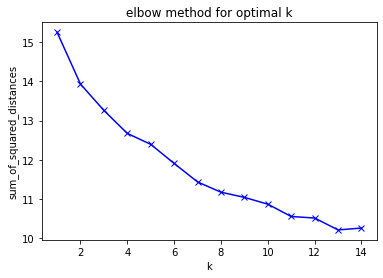

In [182]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(data_master_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

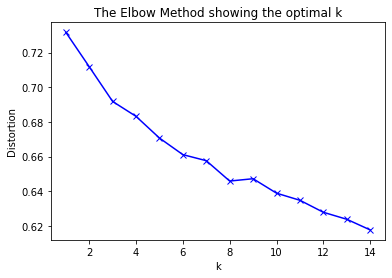

In [183]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_master_grouped_clustering)
    kmeanModel.fit(data_master_grouped_clustering)
    distortions.append(sum(np.min(cdist(data_master_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sanfran_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [184]:
# set number of clusters
kclusters = 9

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=3).fit(data_master_grouped_clustering)

In [185]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([8, 3, 0, 1, 8, 0, 4, 0, 1, 0, 2, 1, 1, 1, 0, 0, 4, 2, 0, 4, 0, 0,
       2, 2, 8, 8, 1, 2, 0, 8, 2, 1, 4, 0, 8, 1, 4, 1, 0, 8, 0, 0, 1, 0,
       8, 1, 2, 0, 4, 2, 0, 0, 3, 0, 1, 0, 1, 3, 4, 0, 4, 8, 2, 1, 8, 0,
       0, 0, 4, 0, 0, 4, 4, 2, 8, 4, 1, 4, 8, 0, 0, 4, 1, 8, 0, 1, 0, 2,
       0, 1, 8, 8, 8, 1, 8, 8, 0, 0, 0, 0, 0, 8, 0, 4, 0, 0, 0, 2, 1, 1,
       1, 1, 0, 8, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 3, 4, 1, 4,
       0, 4, 8, 0, 8, 8, 8, 1, 8, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 8,
       2, 1, 0, 4, 8, 8, 4, 1, 8, 4, 3, 2, 0, 0, 0, 2, 2, 4, 4, 4, 0, 0,
       0, 2, 0, 4, 4, 1, 0, 0, 4, 0, 0, 0, 1, 0, 8, 0, 0, 8, 0, 0, 8, 1,
       0, 0, 0, 0, 0, 0, 3, 4, 2, 0, 0, 0, 1, 0, 1, 2, 0, 4, 0, 8, 2, 8,
       4, 4, 0, 0, 3, 1, 8, 8, 7, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 4, 0, 1,
       8, 0, 2, 8, 8, 3, 2, 0, 0, 0, 3, 0, 0, 0, 3, 8, 4, 3, 4, 2, 1, 3,
       0, 0, 0, 2, 0, 1, 4, 8, 0, 7, 2, 0, 4, 0, 2, 1, 5, 8, 0, 0, 8, 0,
       1, 8, 0, 0, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0])

In [186]:
master_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
master_neighborhoods_venues_sorted.head()

Cluster Labels                  Neighborhood 1st Most Common Venue  \
0               8               Agincourt North    Chinese Restaurant   
1               3  Agincourt South-Malvern West    Chinese Restaurant   
2               0                  Alamo Square      Sushi Restaurant   
3               1                   Albany Park    Mexican Restaurant   
4               8                     Alderwood           Gas Station   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Bakery                  Bank        Sandwich Place   
1      Asian Restaurant         Shopping Mall            Restaurant   
2        Ice Cream Shop           Coffee Shop          Liquor Store   
3        Discount Store     Korean Restaurant                  Park   
4              Pharmacy           Pizza Place                  Park   

   5th Most Common Venue      6th Most Common Venue  7th Most Common Venue  \
0            Pizza Place      Vietnamese Restaurant         Discount Store   
1   Cantonese Restaurant                  BBQ Joint   Caribbean Restaurant   
2     Italian Restaurant   Mediterranean Restaurant                   Park   
3            Pizza Place             Sandwich Place             Hookah Bar   
4         Discount Store                      Hotel         Sandwich Place   

   8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
0            Coffee Shop              Pharmacy            Indian Restaurant  
1   Hong Kong Restaurant                Lounge             Malay Restaurant  
2               Dive Bar          Cocktail Bar                  Pizza Place  
3      Mobile Phone Shop    Chinese Restaurant                   Donut Shop  
4                    Pub     Convenience Store   Construction & Landscaping

In [187]:
# merge toronto_grouped with sanfran_data to add latitude/longitude for each neighborhood
data_master_merged = data_mast

data_master_merged = data_master_merged.join(master_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(data_master_merged.shape)
data_master_merged.head()

(380, 17)


Neighborhood   Longitude   Latitude  \
0               Agincourt North  -79.266712  43.805441   
1  Agincourt South-Malvern West  -79.265612  43.788658   
2                  Alamo Square -122.434465  37.776566   
3                   Albany Park  -87.721560  41.968068   
4                     Alderwood  -79.541611  43.604937   

                      Borough                       City Postal Code  \
0                         NaN            Toronto, Canada         M1S   
1                         NaN            Toronto, Canada         M1S   
2  District 6 - Central North  San Francisco, California       94117   
3      NORTH PARK,ALBANY PARK          Chicago, Illinois       60625   
4                         NaN            Toronto, Canada         M8W   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               8    Chinese Restaurant                Bakery   
1               3    Chinese Restaurant      Asian Restaurant   
2               0      Sushi Restaurant        Ice Cream Shop   
3               1    Mexican Restaurant        Discount Store   
4               8           Gas Station              Pharmacy   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                  Bank        Sandwich Place            Pizza Place   
1         Shopping Mall            Restaurant   Cantonese Restaurant   
2           Coffee Shop          Liquor Store     Italian Restaurant   
3     Korean Restaurant                  Park            Pizza Place   
4           Pizza Place                  Park         Discount Store   

       6th Most Common Venue  7th Most Common Venue  8th Most Common Venue  \
0      Vietnamese Restaurant         Discount Store            Coffee Shop   
1                  BBQ Joint   Caribbean Restaurant   Hong Kong Restaurant   
2   Mediterranean Restaurant                   Park               Dive Bar   
3             Sandwich Place             Hookah Bar      Mobile Phone Shop   
4                      Hotel         Sandwich Place                    Pub   

  9th Most Common Venue       10th Most Common Venue  
0              Pharmacy            Indian Restaurant  
1                Lounge             Malay Restaurant  
2          Cocktail Bar                  Pizza Place  
3    Chinese Restaurant                   Donut Shop  
4     Convenience Store   Construction & Landscaping

In [188]:

#List Cluster Labels as type integer. Check Dataframe Shape
data_master_merged['Cluster Labels']=data_master_merged['Cluster Labels'].astype(int)
print(data_master_merged.shape)

(380, 17)


In [189]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('San Francisco, California')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_master_merged['Latitude'], data_master_merged['Longitude'], data_master_merged['Neighborhood'], data_master_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [190]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 0, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
2                        Alamo Square       94117               0   
5                       Andersonville       60640               0   
7                          Anza Vista       94115               0   
9                       Armour Square       60616               0   
14                           Avondale       60618               0   
15                     Balboa Terrace       94127               0   
18                  Battery Park City                           0   
20                            Bayview       94124               0   
21                    Bayview Heights       94124               0   
28                     Bernal Heights       94110               0   
33                           Boystown       60657               0   
38                    Broadview North         M4K               0   
40                           Bucktown       60647               0   
41   Buena Vista Park/Ashbury Heights       94117               0   
43   Cabbagetown-South St. James Town         M4X               0   
47                      Carnegie Hill       10128               0   
50                     Central Harlem       10030               0   
51                   Central Richmond       94121               0   
53        Central Waterfront/Dogpatch       94107               0   
55                            Chelsea       10011               0   
62                       Civic Center       10278               0   
68                            Clinton       10036               0   
69      Cole Valley/Parnassus Heights       94117               0   
70                     Corona Heights       94114               0   
72                         Cow Hollow       94123               0   
73                     Crocker Amazon       94112               0   
82                           Downtown       94102               0   
83                    Duboce Triangle       94114               0   
87                        East Harlem       10029               0   
89                       East Village       60622               0   
90                       East Village       10009               0   
91                       East Village       60622               0   
92                       East Village       10009               0   
94                          Edgewater       60660               0   
102   Eureka Valley / Dolores Heights       94114               0   
103                         Excelsior       94112               0   
104                Financial District       10005               0   
105  Financial District/Barbary Coast       94111               0   
106                          Flatiron       10011               0   
108                       Forest Hill       94116               0   
110                 Forest Hill South         M5P               0   
111            Forest Hills Extension       94127               0   
112                     Forest Knolls       94131               0   
118                         Glen Park       94131               0   
120                        Gold Coast       60610               0   
122                  Golden Gate Park       94122               0   
123                          Gramercy       10010               0   
126                        Grant Park       60605               0   
127                         Greektown       60661               0   
128                 Greenwich Village       10012               0   
129                 Greenwood-Coxwell         M4L               0   
131                    Haight Ashbury       94117               0   
132                  Hamilton Heights       10031               0   
133                      Hayes Valley       94102               0   
138                 High Park-Swansea         M6S               0   
141                      Hudson Yards       10018               0   
148                         Hyde Park       60615               0   
149                    

In [191]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 1, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  1st Most Common Venue  \
3              Albany Park       60625               1     Mexican Restaurant   
8           Archer Heights       60632               1     Mexican Restaurant   
11          Auburn Gresham       60620               1    American Restaurant   
12                  Austin       60644               1          Grocery Store   
13             Avalon Park       60619               1   Fast Food Restaurant   
26          Belmont Cragin       60639               1             Donut Shop   
31             Black Creek         M3N               1          Grocery Store   
35              Bridgeport       60608               1     Chinese Restaurant   
37           Brighton Park       60632               1     Seafood Restaurant   
42                Burnside       60619               1    Rental Car Location   
45         Calumet Heights       60617               1   Fast Food Restaurant   
54                 Chatham       60619               1   Fast Food Restaurant   
56            Chicago Lawn       60629               1   Fast Food Restaurant   
66                Clearing       60638               1             Restaurant   
79                 Douglas       60616               1         Sandwich Place   
85                 Dunning       60634               1         Clothing Store   
88               East Side       60617               1     Mexican Restaurant   
95             Edison Park       60631               1     Italian Restaurant   
99               Englewood       60636               1   Fast Food Restaurant   
114              Gage Park       60632               1     Mexican Restaurant   
115               Galewood       60707               1     Mexican Restaurant   
116          Garfield Park       60624               1       Botanical Garden   
117         Garfield Ridge       60638               1            Pizza Place   
124        Grand Boulevard       60653               1              BBQ Joint   
125         Grand Crossing       60619               1    American Restaurant   
136                Hermosa       60639               1     Mexican Restaurant   
145          Humboldt Park       60651               1          Grocery Store   
161         Jefferson Park       60630               1            Pizza Place   
167                Kenwood       60615               1            Pizza Place   
193         Little Village       60623               1     Mexican Restaurant   
200        Lower West Side       60608               1     Mexican Restaurant   
209          Mckinley Park       60609               1             Donut Shop   
222              Montclare       60707               1             Shoe Store   
224            Morgan Park       60643               1              BBQ Joint   
237               New City       60609               1     Mexican Restaurant   
247         North Lawndale       60623               1   Fast Food Restaurant   
253           Norwood Park       60631               1                   Park   
274           Portage Park       60641               1            Pizza Place   
281                Pullman       60628               1    Fried Chicken Joint   
291               Roseland       60628               1         Discount Store   
298  Sauganash,Forest Glen       60646               1                   Park   
306          South Chicago       60617               1          Train Station   
345        Washington Park       60637               1   Fast Food Restaurant   
347            West Elsdon       60629               1     Mexican Restaurant   
350              West Lawn       60629               1     Mexican Restaurant   
353           West Pullman       60628               1                   Bank   
354             West Ridge       60645               1      Indian Restaurant   

     2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
3           Discount Store      Korean Restaurant

In [192]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 2, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
10                    Ashburn       60652               2   
17             Bathurst Manor         M3H               2   
22            Bayview Village         M2K               2   
23      Bayview Woods-Steeles         M2H               2   
27                    Bendale         M1P               2   
30      Birchcliffe-Cliffside         M1N               2   
46          Candlestick Point                           2   
49     Centennial Scarborough         M1C               2   
65          Clarendon Heights       94114               2   
76            Diamond Heights       94131               2   
93   Edenbridge-Humber Valley         M9A               2   
113               Fuller Park       60609               2   
130                 Guildwood         M1E               2   
147             Hunters Point       94124               2   
160              Jackson Park       60637               2   
171                Lake Shore       94132               2   
175        Lambton Baby Point         M6S               2   
176          Lansing-Westgate         M2N               2   
189          Little Hollywood       94134               2   
218             Miraloma Park       94127               2   
225               Morningside         M1E               2   
230           Mount Greenwood       60655               2   
256                   Oakland       60653               2   
260             Old East York         M4J               2   
273             Pleasant View         M2J               2   
279        Princess-Rosethorn         M9B               2   
286         Rockcliffe-Smythe         M6N               2   
290       Rosedale-Moore Park         M4W               2   
307             South Deering       60617               2   
318                 Sunnyside       94112               2   
358       Westminster-Branson         M2R               2   
361        Westwood Highlands       94127               2   

     1st Most Common Venue  2nd Most Common Venue     3rd Most Common Venue  \
10    Fast Food Restaurant                   Park                 Locksmith   
17                    Park      Convenience Store               Men's Store   
22                    Park               Pharmacy             Deli / Bodega   
23                    Park                   Bank              Liquor Store   
27                    Park                Dog Run         Indian Restaurant   
30                    Park                  Diner                  Gym Pool   
46                    Park       Football Stadium       American Restaurant   
49              Playground                    Bar                      Park   
65                   Trail                   Park            Scenic Lookout   
76                    Park             Playground                     Trail   
93                    Park      Convenience Store         Electronics Store   
113                   Park   Fast Food Restaurant                Restaurant   
130          Train Station                   Park             Grocery Store   
147                   Park             Restaurant             Grocery Store   
160                   Park         Science Museum           Harbor / Marina   
171                  Trail                   Lake               Golf Course   
175                   Park                    ATM               Pizza Place   
176                   Park                    Spa                  Ski Area   
189                   Park                   Café         Convenience Store   
218                   Park            Bus Station               Pizza Place   
225            Coffee Shop                   Park                  Pharmacy   
230                   Park           Intersection                  Dive Bar   
256                   Park                  Beach   Health & Beauty Service   
260                   Park        Thai Restaurant                       Pub   
273                   Park  

In [193]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 3, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
1    Agincourt South-Malvern West         M1S               3   
52                 Central Sunset       94122               3   
60                      Chinatown       10002               3   
59                      Chinatown       60616               3   
58                      Chinatown       10002               3   
57                      Chinatown       60616               3   
121           Golden Gate Heights       94116               3   
134                     Hegewisch       60633               3   
153                Inner Parkside       94116               3   
157                       Ionview         M1K               3   
170                    L'Amoreaux         M1W               3   
216                      Milliken         M1V               3   
236               Near South Side       60616               3   
259                     Oceanview       94112               3   
264                Outer Richmond       94121               3   
268                      Parkside       94116               3   
271                Pine Lake Park       94132               3   
275                       Portola       94134               3   
313                       Steeles         M1W               3   
352                   West Portal       94127               3   

    1st Most Common Venue   2nd Most Common Venue     3rd Most Common Venue  \
1      Chinese Restaurant        Asian Restaurant             Shopping Mall   
52     Chinese Restaurant   Vietnamese Restaurant           Bubble Tea Shop   
60     Chinese Restaurant          Ice Cream Shop                      Café   
59     Chinese Restaurant          Ice Cream Shop                      Café   
58     Chinese Restaurant          Ice Cream Shop                      Café   
57     Chinese Restaurant          Ice Cream Shop                      Café   
121    Chinese Restaurant                    Park                     Trail   
134    Chinese Restaurant          Baseball Field   State / Provincial Park   
153    Chinese Restaurant             Pizza Place                      Park   
157    Chinese Restaurant             Coffee Shop             Deli / Bodega   
170    Chinese Restaurant                    Bank                  Gym Pool   
216              Pharmacy                    Park        Chinese Restaurant   
236    Chinese Restaurant                    Park                    Bakery   
259    Chinese Restaurant                  Bakery              Intersection   
264    Chinese Restaurant                    Café                  Bus Stop   
268    Chinese Restaurant                    Park            Sandwich Place   
271    Chinese Restaurant                    Park            Sandwich Place   
275    Chinese Restaurant                  Bakery                      Park   
313    Chinese Restaurant      Dim Sum Restaurant           Bubble Tea Shop   
352    Chinese Restaurant                    Park               Pizza Place   

    4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
1              Restaurant   Cantonese Restaurant             BBQ Joint   
52                 Bakery            Coffee Shop                  Bank   
60         Sandwich Place            Pizza Place      Asian Restaurant   
59         Sandwich Place            Pizza Place      Asian Restaurant   
58         Sandwich Place            Pizza Place      Asian Restaurant   
57         Sandwich Place            Pizza Place      Asian Restaurant   
121              Bus Stop           Dessert Shop     Korean Restaurant   
134   American Restaurant           Fishing Spot    Falafel Restaurant   
153      Sushi Restaurant         Sandwich Place                   Pub   
157    Light Rail Station         Baseball Field                  Bank   
170           Pizza Place            Coffee Shop                Bakery   
216                Bakery                  Trail        Discount Store   
236           Pizza Place       A

In [194]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 4, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
6                                  Annex         M5R               4   
16                     Banbury-Don Mills         M3B               4   
19                   Bay Street Corridor         M5G               4   
32                           Blake-Jones         M4J               4   
36     Bridle Path-Sunnybrook-York Mills         M3C               4   
48                             Casa Loma         M5R               4   
61                 Church-Yonge Corridor         M5B               4   
63                   Clairlea-Birchmount         M1L               4   
71                Corso Italia-Davenport         M6E               4   
74                              Danforth         M4J               4   
75                    Danforth East York         M4J               4   
78                           Dorset Park         M1P               4   
80   Dovercourt-Wallace Emerson-Junction         M6H               4   
84                        Dufferin Grove         M6H               4   
109                    Forest Hill North         M6C               4   
135                           Henry Farm         M2J               4   
137                      High Park North         M6P               4   
139                       Highland Creek         M1C               4   
163                        Junction Area         M6P               4   
166                 Kensington-Chinatown         M5T               4   
169                       Kingsway South         M8X               4   
177                  Lawrence Park North         M4N               4   
178                  Lawrence Park South         M4R               4   
179                   Leaside-Bennington         M4G               4   
191                    Little Italy, UIC       60608               4   
192                      Little Portugal         M6K               4   
196                          Long Branch         M8W               4   
217                               Mimico         M8Z               4   
227                            Moss Park         M5A               4   
232                  Mount Pleasant East         M4S               4   
233                  Mount Pleasant West         M4S               4   
250                      North Riverdale         M4K               4   
251                 North St. James Town         M4X               4   
270                 Pelmo Park-Humberlea         M9M               4   
272             Playter Estates-Danforth         M4K               4   
282                          Regent Park         M5A               4   
288                         Roncesvalles         M6R               4   
308                       South Parkdale         M6K               4   
323                           Tenderloin       94102               4   
324                          The Beaches         M4L               4   
326                     Thorncliffe Park         M4H               4   
328                    Trinity-Bellwoods         M6J               4   
334                           University         M5S               4   
346    Waterfront Communities-The Island                           4   
349               West Humber-Clairville         M9W               4   
360                   Weston-Pellam Park         M6N               4   
369                    Woodbine Corridor         M4L               4   
373                             Wychwood         M6G               4   
375                       Yonge-Eglinton         M5P               4   
376                       Yonge-St.Clair         M4V               4   

    1st Most Common Venue    2nd Most Common Venue  \
6      Italian Restaurant              Coffee Shop   
16             Restaurant              Coffee Shop   
19            Coffee Shop                     Café   
32                   Café              Coffee Shop   
36                   Café                    Trail   
48            Coffee Shop      

In [195]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 5, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
292        Rouge         M1B               5           Zoo Exhibit   

    2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
292                   Zoo          Dessert Shop   Other Great Outdoors   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
292          Tram Station               Daycare               Exhibit   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
292           Fabric Shop    Falafel Restaurant                   Farm

In [196]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 6, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
314  Stonegate-Queensway         M8Y               6    Italian Restaurant   

            2nd Most Common Venue  3rd Most Common Venue  \
314   Eastern European Restaurant   Gym / Fitness Center   

    4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
314        Ice Cream Shop   Fast Food Restaurant     Fish & Chips Shop   

           7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
314   Financial or Legal Service   Filipino Restaurant                 Field   

    10th Most Common Venue  
314            Zoo Exhibit

In [197]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 7, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels 1st Most Common Venue  \
240      Newtonbrook West         M2R               7                  Park   
285             Riverdale       60628               7                  Park   
312  St.Andrew-Windfields         M2L               7                  Park   
366       Willowdale West         M2N               7                  Park   

    2nd Most Common Venue      3rd Most Common Venue  \
240           Summer Camp               Skating Rink   
285         Grocery Store                       Food   
312        Baseball Field                       Pool   
366           Coffee Shop   Mediterranean Restaurant   

        4th Most Common Venue 5th Most Common Venue  \
240            Farmers Market     Fish & Chips Shop   
285               Zoo Exhibit   Filipino Restaurant   
312               Zoo Exhibit                 Field   
366   Health & Beauty Service           Zoo Exhibit   

           6th Most Common Venue        7th Most Common Venue  \
240   Financial or Legal Service          Filipino Restaurant   
285                  Fish Market            Fish & Chips Shop   
312                  Fish Market            Fish & Chips Shop   
366            Fish & Chips Shop   Financial or Legal Service   

           8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
240                        Field   Fast Food Restaurant            Zoo Exhibit  
285   Financial or Legal Service                  Field            Flea Market  
312   Financial or Legal Service    Filipino Restaurant   Fast Food Restaurant  
366          Filipino Restaurant                  Field         Farmers Market

In [198]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 8, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood Postal Code  Cluster Labels  \
0                      Agincourt North         M1S               8   
4                            Alderwood         M8W               8   
24                Bedford Park-Nortown         M5M               8   
25             Beechborough-Greenbrook         M6M               8   
29                             Beverly       60643               8   
34                Briar Hill-Belgravia         M6E               8   
39                 Brookhaven-Amesbury         M6M               8   
44                  Caledonia-Fairbank         M6E               8   
64                        Clanton Park         M3H               8   
67                          Cliffcrest         M1M               8   
77                  Don Valley Village         M2J               8   
81                Downsview-Roding-CFB         M3M               8   
86                   East End-Danforth         M4E               8   
96                       Eglinton East         M1J               8   
97                    Elms-Old Rexdale         M9W               8   
98                 Englemount-Lawrence         M6A               8   
100     Eringate-Centennial-West Deane         M9C               8   
101                Etobicoke West Mall         M9C               8   
107                    Flemingdon Park         M3C               8   
119             Glenfield-Jane Heights         M3L               8   
140                  Hillcrest Village         M2H               8   
142           Humber Heights-Westmount         M9P               8   
143                      Humber Summit         M9L               8   
144                         Humbermede         M9M               8   
146                 Humewood-Cedarvale         M6C               8   
159         Islington-City Centre West         M9B               8   
164           Keelesdale-Eglinton West         M6M               8   
165                       Kennedy Park         M1K               8   
168      Kingsview Village-The Westway         M9P               8   
202                            Malvern                           8   
205                         Maple Leaf         M6L               8   
208                      Markland Wood         M9C               8   
229                       Mount Dennis         M6M               8   
231  Mount Olive-Silverstone-Jamestown         M9V               8   
238                        New Toronto         M8V               8   
239                   Newtonbrook East         M2M               8   
254                  O'Connor-Parkview         M4B               8   
257                           Oakridge         M1L               8   
258                    Oakwood Village         M6E               8   
269                  Parkwoods-Donalda         M3A               8   
283                    Rexdale-Kipling         M9W               8   
293       Runnymede-Bloor West Village         M6S               8   
296                             Rustic         M6L               8   
299                Scarborough Village         M1M               8   
320             Tam O'Shanter-Sullivan         M1T               8   
321                      Taylor-Massey         M4C               8   
325       Thistletown-Beaumond Heights         M9V               8   
339                   Victoria Village         M4A               8   
340                  Visitacion Valley       94134               8   
348                          West Hill         M1E               8   
359                             Weston         M9N               8   
363                   Wexford/Maryvale         M1R               8   
365                    Willowdale East         M2N               8   
367   Willowridge-Martingrove-Richview         M9R               8   
368                             Woburn         M1H               8   
370                   Woodbine-Lumsden         M4C               8   
371                           Woodla

In [3]:
import pandas as pd

### Ideal preferences 

In [6]:
ideal_nbrhds=pd.read_excel(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\ideal_nbrhds.xlsx')

In [11]:
#code to run the above function on each neighborhood and create a new dataframe called *df_venues*

ideal_nbrhd_venues = getNearbyVenues(names=ideal_nbrhds['Neighborhood'],
                                   latitudes=ideal_nbrhds['Latitude'],
                                   longitudes=ideal_nbrhds['Longitude'])

 University Park 
 Uptown 
 Lower Greenville 
 Central Boulder 
 North Buckhead 


In [12]:
ideal_nbrhd_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      University Park               32.846265              -96.790745   
1      University Park               32.846265              -96.790745   
2      University Park               32.846265              -96.790745   
3      University Park               32.846265              -96.790745   
4      University Park               32.846265              -96.790745   
5      University Park               32.846265              -96.790745   
6      University Park               32.846265              -96.790745   
7      University Park               32.846265              -96.790745   
8      University Park               32.846265              -96.790745   
9      University Park               32.846265              -96.790745   
10     University Park               32.846265              -96.790745   
11     University Park               32.846265              -96.790745   
12     University Park               32.846265              -96.790745   
13     University Park               32.846265              -96.790745   
14     University Park               32.846265              -96.790745   
15     University Park               32.846265              -96.790745   
16     University Park               32.846265              -96.790745   
17     University Park               32.846265              -96.790745   
18     University Park               32.846265              -96.790745   
19     University Park               32.846265              -96.790745   
20     University Park               32.846265              -96.790745   
21     University Park               32.846265              -96.790745   
22     University Park               32.846265              -96.790745   
23     University Park               32.846265              -96.790745   
24     University Park               32.846265              -96.790745   
25     University Park               32.846265              -96.790745   
26     University Park               32.846265              -96.790745   
27     University Park               32.846265              -96.790745   
28     University Park               32.846265              -96.790745   
29     University Park               32.846265              -96.790745   
30     University Park               32.846265              -96.790745   
31     University Park               32.846265              -96.790745   
32     University Park               32.846265              -96.790745   
33     University Park               32.846265              -96.790745   
34     University Park               32.846265              -96.790745   
35     University Park               32.846265              -96.790745   
36     University Park               32.846265              -96.790745   
37     University Park               32.846265              -96.790745   
38     University Park               32.846265              -96.790745   
39     University Park               32.846265              -96.790745   
40     University Park               32.846265              -96.790745   
41     University Park               32.846265              -96.790745   
42     University Park               32.846265              -96.790745   
43     University Park               32.846265              -96.790745   
44     University Park               32.846265              -96.790745   
45     University Park               32.846265              -96.790745   
46     University Park               32.846265              -96.790745   
47     University Park               32.846265              -96.790745   
48     University Park               32.846265              -96.790745   
49     University Park               32.846265              -96.790745   
50     University Park               32.846265              -96.790745   
51     University Park               32.846265              -96.790745   
52     University Park               32.846265              -96.790745   
53     Universi

In [13]:

## Number of Venues for each Neighborhood
print(ideal_nbrhd_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(ideal_nbrhd_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(ideal_nbrhd_venues['Venue Category'].unique())))
ideal_onehot = pd.get_dummies(ideal_nbrhd_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
ideal_onehot['Neighborhood'] = ideal_nbrhd_venues['Neighborhood'] 
ideal_onehot.head()

# move neighborhood column to the first column
fixed_columns = [ideal_onehot.columns[-1]] + list(ideal_onehot.columns[:-1])
print(fixed_columns)

ideal_onehot = ideal_onehot[fixed_columns]
ideal_onehot.head()
print(ideal_onehot.shape)
ideal_grouped = ideal_onehot.groupby('Neighborhood').mean().reset_index()
ideal_grouped.head()

                    Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                               
 Central Boulder                      100                     100    100   
 Lower Greenville                      62                      62     62   
 North Buckhead                       100                     100    100   
 University Park                       60                      60     60   
 Uptown                               100                     100    100   

                    Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                         
 Central Boulder               100              100             100  
 Lower Greenville               62               62              62  
 North Buckhead                100              100             100  
 University Park                60               60              60  
 Uptown                        100             

Neighborhood   Accessories Store   American Restaurant  \
0    Central Boulder                 0.00              0.040000   
1   Lower Greenville                 0.00              0.032258   
2     North Buckhead                 0.02              0.040000   
3    University Park                 0.00              0.000000   
4             Uptown                 0.01              0.050000   

    Arts & Crafts Store   Asian Restaurant   Athletics & Sports  \
0              0.030000               0.01                 0.00   
1              0.016129               0.00                 0.00   
2              0.000000               0.00                 0.01   
3              0.000000               0.00                 0.00   
4              0.020000               0.02                 0.00   

    Automotive Shop   BBQ Joint   Bagel Shop    Bakery      Bank       Bar  \
0          0.000000    0.000000     0.010000  0.010000  0.000000  0.010000   
1          0.000000    0.000000     0.000000  0.032258  0.000000  0.048387   
2          0.000000    0.000000     0.000000  0.030000  0.000000  0.010000   
3          0.016667    0.016667     0.016667  0.033333  0.033333  0.000000   
4          0.000000    0.000000     0.000000  0.010000  0.000000  0.010000   

    Baseball Field   Beer Garden   Big Box Store   Bike Shop   Bookstore  \
0         0.000000      0.010000            0.00        0.01        0.02   
1         0.000000      0.016129            0.00        0.00        0.00   
2         0.000000      0.000000            0.01        0.00        0.00   
3         0.016667      0.000000            0.00        0.00        0.00   
4         0.000000      0.020000            0.00        0.00        0.00   

    Boutique   Brazilian Restaurant   Breakfast Spot   Brewery   Burger Joint  \
0       0.00                   0.00             0.01      0.01       0.000000   
1       0.00                   0.00             0.00      0.00       0.016129   
2       0.02                   0.00             0.00      0.00       0.020000   
3       0.00                   0.00             0.00      0.00       0.016667   
4       0.00                   0.01             0.01      0.00       0.020000   

    Burrito Place   Business Service      Café   Cajun / Creole Restaurant  \
0            0.01               0.00  0.010000                    0.010000   
1            0.00               0.00  0.032258                    0.032258   
2            0.00               0.00  0.000000                    0.000000   
3            0.00               0.00  0.000000                    0.000000   
4            0.00               0.01  0.020000                    0.000000   

    Candy Store   Chinese Restaurant   Chocolate Shop   Clothing Store  \
0          0.01             0.020000         0.000000         0.020000   
1          0.00             0.032258         0.016129         0.016129   
2          0.00             0.000000         0.010000         0.050000   
3          0.00             0.000000         0.000000         0.000000   
4          0.00             0.000000         0.000000         0.010000   

    Cocktail Bar   Coffee Shop   College Auditorium   College Quad  \
0           0.01      0.060000             0.000000       0.000000   
1           0.00      0.016129             0.000000       0.000000   
2           0.00      0.010000             0.000000       0.000000   
3           0.00      0.033333             0.016667       0.016667   
4           0.04      0.040000             0.000000       0.000000   

    Concert Hall   Construction & Landscaping   Convenience Store  \
0           0.01                     0.000000            0.000000   
1           0.00                     0.000000            0.016129   
2           0.00                     0.000000            0.000000   
3           0.00                     0.016667            0.016667   
4           0.00                     0.000000            0.000000   

    Cosmetics Shop   Cupcake Shop   Cycl

### Ideal Most Common Venues

In [16]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
ideal_venues_sorted = pd.DataFrame(columns=columns)
ideal_venues_sorted['Neighborhood'] = ideal_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(ideal_grouped.shape[0]):
    ideal_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ideal_grouped.iloc[ind, :], num_top_venues)

ideal_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0    Central Boulder            Coffee Shop   American Restaurant   
1   Lower Greenville           Dessert Shop    Mexican Restaurant   
2     North Buckhead         Cosmetics Shop         Women's Store   
3    University Park         Sandwich Place    Salon / Barbershop   
4             Uptown    American Restaurant      Sushi Restaurant   

  3rd Most Common Venue     4th Most Common Venue  5th Most Common Venue  \
0        Ice Cream Shop   New American Restaurant     Mexican Restaurant   
1      Sushi Restaurant                       Bar                 Bakery   
2            Steakhouse            Clothing Store       Department Store   
3    Seafood Restaurant                    Bakery   Fast Food Restaurant   
4              Wine Bar              Cocktail Bar            Coffee Shop   

  6th Most Common Venue       7th Most Common Venue 8th Most Common Venue  \
0    Italian Restaurant         Arts & Crafts Store             Gift Shop   
1                  Café   Cajun / Creole Restaurant    Chinese Restaurant   
2                 Hotel         American Restaurant    Italian Restaurant   
3            Restaurant                 Pizza Place    Italian Restaurant   
4    Salon / Barbershop                 Pizza Place    Seafood Restaurant   

  9th Most Common Venue   10th Most Common Venue  
0    Chinese Restaurant                      Pub  
1           Pizza Place            Grocery Store  
2             Hotel Bar   Furniture / Home Store  
3                  Bank                     Park  
4          Dessert Shop     Gym / Fitness Center

In [43]:
#Obtain average of all cities to mimic ideal city
ideal_avg = ideal_grouped.mean().T

ideal_avg = pd.DataFrame(ideal_avg.T)

ideal_avg=ideal_avg.transpose()

ideal_avg.head()

In [59]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = []
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

['1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

In [67]:
#add common venues into new dataframe
ideal_avg_sorted = return_most_common_venues(ideal_avg.iloc[0], num_top_venues)

ideal_avg_sorted

array([' American Restaurant', ' Coffee Shop', ' Sushi Restaurant',
       ' Italian Restaurant', ' Pizza Place', ' Mexican Restaurant',
       ' Bakery', ' New American Restaurant', ' Dessert Shop',
       ' Clothing Store'], dtype=object)

In [78]:
ideal_avg_ven=pd.DataFrame(ideal_avg_sorted)
ideal_avg_ven=ideal_avg_ven.transpose()
ideal_avg_ven.columns=columns
ideal_avg_ven

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0   American Restaurant           Coffee Shop      Sushi Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0    Italian Restaurant           Pizza Place    Mexican Restaurant   

  7th Most Common Venue     8th Most Common Venue 9th Most Common Venue  \
0                Bakery   New American Restaurant          Dessert Shop   

  10th Most Common Venue  
0         Clothing Store